<a href="https://colab.research.google.com/github/AlanAmaro13/Introduction_NLP/blob/main/NLP_Specialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Procesing (NLP)

## What is Natural Language Processing?
--> Answer given by ChatGPT.

Natural Language Processing (NLP) is a field of artificial intelligence (AI) and linguistics focused on the interaction between computers and humans through natural language. The goal of NLP is to enable computers to understand, interpret, generate, and manipulate human language in a way that is valuable and meaningful.

Here are the key areas of NLP:

1. **Text Processing**: Breaking down and analyzing the structure of text, including tokenization (splitting text into words or sentences), stemming, and lemmatization (reducing words to their base form).

2. **Speech Recognition**: Converting spoken language into written text, as in voice assistants like Siri or Alexa.

3. **Sentiment Analysis**: Determining the emotional tone behind a series of words to understand attitudes, opinions, or emotions expressed.

4. **Machine Translation**: Automatically translating text or speech from one language to another, such as Google Translate.

5. **Named Entity Recognition (NER)**: Identifying and classifying named entities like people, organizations, dates, or locations within a text.

6. **Part-of-Speech (POS) Tagging**: Identifying the parts of speech (like nouns, verbs, adjectives) for each word in a text.

7. **Question Answering**: Enabling machines to respond to human questions in natural language, such as chatbots or virtual assistants.

8. **Text Generation**: Creating coherent and contextually relevant text, which can be used for automated content creation or conversational agents.

NLP uses various techniques, including machine learning (ML), deep learning, and statistical methods, to process and analyze vast amounts of language data.

This DeepLearning Specialization has the main purpose to create Artificial Inteligence Models able to use language, generate text with context, and have the ability to detect good or bad sentiments in tweets, etc.

# Classification and Vector Spaces

## First week: Logistic Regression

This first week has the main purpose to learn how to represente text as a vector and build a classifier, we'll be doing this using logistic regresion to get a good base to start. So, a first question could be, how can I convert text to a mathematical base?

### Vocabulary and Features Extraction

**Vocabulary and features extraction:** So, you have a text and what can you do with it?

It order to the model to learn from this text it's necessary to extract unique values, this is, the words. And how can you do that? First we must create a vocabulary.

What's a vocabulary? A vocabulary is a set contaning all the words (not repeated words) presents in your text, so, each word in your text can be represented as a linear combination of your vocabulary. The dimension of this sets is denoted as V, and corresponds to the total amount of words in your text. Note that you'll end with a sparse matrix, this is, a matrix containig a lot of zeros, so the learning will slow down.


* The process to extract uniquec values is denote as Features Extraction.

After this, we're gonna be using Logistic regression, if you're totally new using AI, you may want to check this notebook first: [Introduction to Keras 3 - AI](https://github.com/AlanAmaro13/Introduction_to_Keras_3).


As summary, you have a set of values X,Y and you want to make a good function in order to predict Y values, so you use AI and you get yourself a first model that predicts Y' values. How good is your model? You can use the difference between Y-Y' to get an idea about good it is, this is call Cost Function.


A good model is a model that reduces the cost function.


### Positive and Negative Frequencies

How many times does a *bad word* appears in a *Bad tweet*? In order to classify the tweets acording to the words in the text we get the frequency of good and bad words. To do this, we define a function able to count how many times a word is repeated in good and a in bad tweets and later we set a dictionary containing the Good and Bad frequency.

* This is denoted as a count

And why do we want to this? Well, in the before topic we end up with a sparse matrix to represent a tweet, in this case we'll end with a 3D vector! This vector contains the bias, *the sum of good frequencies*, and the *sum of bad frequencies*, so your model doesn't have to learn a lot of parameters, only 3!


So, you have a
* freqs: dictionary mapping from words to frequency.

And with this you can denote an arbitrary tweet *m* as:
$$x_{m} = [1, \sum_{m}freqs_{G}(w,1), \sum_{n}freqs_{B}(w,1)] $$
So, you get the sum of good frequencies from the word in your tweet, and do the same thing for the bad words. **Note that you only sum one time the word**. After this, you'd have a vector in the next from:
$$[1,8,11] $$
Where $1$ denotes a Bias, $8$ denotes good frequency and $11$ denotes bad frequency.

So, let's do it. First we must create a Vocabulary, and start counting!

### Preprocessing

Preprocessing is the action to remove non-desire characteres in your text, such as punctuation marks, URLs, tags, etc. Also, this process converts all words to their lower case.  

* Remove all words to no add significant meaning (Stop Words and Punctuation)
* Remove handles and URLs
* NOTE: Sometimes punctuation add significat meaning to your text

**Stemming and lowercasing**: This action takes any verb to the main form, for example, *tunning* to *tun*.

Lowercasing refers to convert any word to its lowercase

And the main steps to do text processing are:
* Remove handles and URLs
* Tokenize: Converts strings into words
* Remove stop words (and, is, a, on, ...)
* Stemming - Converts any word to its steam: *dancer to danc*
* Lowercasing

### A first code!

So, you may be wondering how are we do all this stuff? First, we're gonna review a Python Library: NLTK. This package contains all the functions needed to start doing NLP.

This library contains functions to handling, collecting and processing Twitter data. So, the first steps is installing!

In [ ]:
! pip install nltk

In [ ]:
# Import the libraries used:

import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator
import pandas as pd

Which DataSet are we gonna be using? Twitter samples dataset contains over 10k tweets: 5k good tweets and 5k bad tweets, so it's a good start point 'cause you have a balance data.

In [ ]:
nltk.download('twitter_samples')  # Download the dataset

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [ ]:
# Separate positive and negative tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [ ]:
print(positive_tweets)

['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)', '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!', '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!', '@97sides CONGRATS :)', 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days', '@BhaktisBanter @PallaviRuhail This one is irresistible :)\n#FlipkartFashionFriday http://t.co/EbZ0L2VENM', "We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI", '@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.', 'Jgh , but we have to go to Bayan :D bye', 'As an act of mischievousness, am calling the ETL layer of our in-house warehousing app Katam

As you can notice, each set contains strings elements refers to a tweet

In [ ]:
print('Number of positive tweets: ', len(positive_tweets))
print('Number of negative tweets: ', len(negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(positive_tweets))
print('The type of a tweet entry is: ', type(negative_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


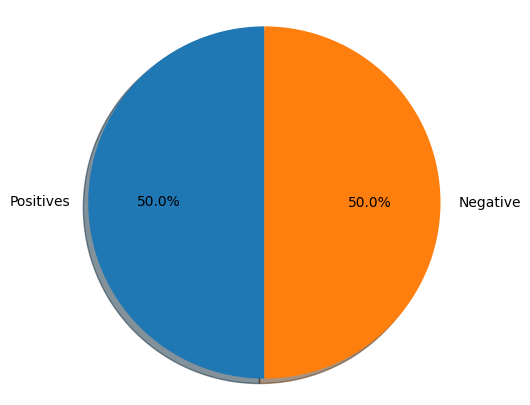

In [ ]:
#  Other way to see the information is using a Pie Chart
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'Positives', 'Negative'

# Sizes for each slide
sizes = [len(positive_tweets), len(negative_tweets)]

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the chart
plt.show()

In [ ]:
# We can also review some tweets:
# print positive in greeen
print('\033[92m' + positive_tweets[random.randint(0,5000)])

# print negative in red
print('\033[91m' + negative_tweets[random.randint(0,5000)])

@paulbeaton720 Looking good! Let us know what you think when you've tried them :)
i miss them already :(


#### Preprocessing again

As you already know, preprocessing removes all no-desiere characters and words, so in this section we focus in how to do it

In [ ]:
# We're gonna do this just for one tweet
tweet = positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [ ]:
# In order to remove StopWords, we're gonna be using the vocabulary
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# And we'll use the next libraries:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [ ]:
# Remove URLs, Twitter marks and styles:
print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [ ]:
# Tokenize the tweet:
print()
print('\033[92m' + tweet2)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print('Tokenized string:')
print(tweet_tokens)


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 

Tokenized string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


In [ ]:
# We're gonna remove the stops words and puntuaction marks in English

#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english')

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [ ]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)



['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

removed stop words and punctuation:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


In [ ]:
# Stemming
# We use the PorterStemmer module which uses the Porter Stemming Algorithm

print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer()

# Create an empty list to store the stems
tweets_stem = []

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)



['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

stemmed words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


#### Feature Extraction

Once we've processed our data, the next step is starting to extract features using a vocabulary, a frequency function and a matrix creation function.

1) Preprocessing - Already done

2) Feature Extraction using a frequency dictionary

3) Matrix Form: $m$ rows and $3$ columns

In [ ]:
# Building and Visualizing word frequencies:
txt  ='''
In this section we create a frequencies function
able to count how many times a word appears in the
bad and good section.
'''
import numpy as np

# In this case, we're gonna be using two
# functions: process_tweet() and
# bulid_freqs()

# Create the list with all tweets:
tweets = positive_tweets + negative_tweets

# Separates the values
labels = np.append(np.ones(len(positive_tweets)), np.zeros(len(negative_tweets)) )


In [ ]:
# Process_tweet function:

def process_tweet(tweet):
  '''
  Process tweet:
  Input: Recieves a tweet

  Output: Return a list with each processed tweet.
  '''

  p_tweet = re.sub(r'^RT[\s]+', '', tweet) # Remove the world RT
  p_tweet = re.sub(r'https?://[^\s\n\r]+', '', p_tweet) # Remove hyperlinks
  p_tweet = re.sub(r'#', '', p_tweet) # Remove hash symbol

  # Tokenizer use
  tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

  tweet_tokens = tokenizer.tokenize(p_tweet)

  # Remove stop words
  tweets_clean = []

  for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

  # Stemming:

  stemmer = PorterStemmer()
  tweets_stem = []

  for word in tweets_clean:
    stem_word = stemmer.stem(word)
    tweets_stem.append(stem_word)

  return tweets_stem

# We're gonna use it

print(process_tweet(positive_tweets[2277]))

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [ ]:
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency: ('shame', 0) : 19
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1
    return freqs



In [ ]:
# So ce can obtain our frequency dictionary

freqs_dict = build_freqs(tweets, labels)

print(freqs_dict)

{('followfriday', 1.0): 25, ('top', 1.0): 32, ('engag', 1.0): 7, ('member', 1.0): 16, ('commun', 1.0): 33, ('week', 1.0): 83, (':)', 1.0): 3691, ('hey', 1.0): 77, ('jame', 1.0): 7, ('odd', 1.0): 2, (':/', 1.0): 5, ('pleas', 1.0): 99, ('call', 1.0): 37, ('contact', 1.0): 7, ('centr', 1.0): 2, ('02392441234', 1.0): 1, ('abl', 1.0): 8, ('assist', 1.0): 1, ('mani', 1.0): 33, ('thank', 1.0): 643, ('listen', 1.0): 17, ('last', 1.0): 47, ('night', 1.0): 68, ('bleed', 1.0): 2, ('amaz', 1.0): 51, ('track', 1.0): 5, ('scotland', 1.0): 2, ('congrat', 1.0): 21, ('yeaaah', 1.0): 1, ('yipppi', 1.0): 1, ('accnt', 1.0): 2, ('verifi', 1.0): 2, ('rqst', 1.0): 1, ('succeed', 1.0): 1, ('got', 1.0): 69, ('blue', 1.0): 9, ('tick', 1.0): 1, ('mark', 1.0): 1, ('fb', 1.0): 6, ('profil', 1.0): 2, ('15', 1.0): 5, ('day', 1.0): 246, ('one', 1.0): 131, ('irresist', 1.0): 2, ('flipkartfashionfriday', 1.0): 17, ('like', 1.0): 233, ('keep', 1.0): 68, ('love', 1.0): 401, ('custom', 1.0): 4, ('wait', 1.0): 70, ('long',

In [ ]:
# We can plot this using
data = []

for word in freqs_dict.keys():
  word = word[0]
  pos, neg = 0, 0

  if (word, 1.0) in freqs_dict:
    pos = freqs_dict[(word, 1.0)]

  if (word, 0.0) in freqs_dict:
    neg = freqs_dict[(word, 0.0)]

  data.append([word, pos, neg])

data



[['followfriday', 25, 0],
 ['top', 32, 6],
 ['engag', 7, 0],
 ['member', 16, 6],
 ['commun', 33, 2],
 ['week', 83, 56],
 [':)', 3691, 2],
 ['hey', 77, 26],
 ['jame', 7, 4],
 ['odd', 2, 3],
 [':/', 5, 11],
 ['pleas', 99, 275],
 ['call', 37, 29],
 ['contact', 7, 7],
 ['centr', 2, 2],
 ['02392441234', 1, 0],
 ['abl', 8, 23],
 ['assist', 1, 0],
 ['mani', 33, 29],
 ['thank', 643, 107],
 ['listen', 17, 18],
 ['last', 47, 73],
 ['night', 68, 46],
 ['bleed', 2, 1],
 ['amaz', 51, 16],
 ['track', 5, 3],
 ['scotland', 2, 2],
 ['congrat', 21, 2],
 ['yeaaah', 1, 0],
 ['yipppi', 1, 0],
 ['accnt', 2, 0],
 ['verifi', 2, 0],
 ['rqst', 1, 0],
 ['succeed', 1, 0],
 ['got', 69, 104],
 ['blue', 9, 5],
 ['tick', 1, 0],
 ['mark', 1, 2],
 ['fb', 6, 7],
 ['profil', 2, 1],
 ['15', 5, 10],
 ['day', 246, 150],
 ['one', 131, 149],
 ['irresist', 2, 0],
 ['flipkartfashionfriday', 17, 0],
 ['like', 233, 228],
 ['keep', 68, 34],
 ['love', 401, 152],
 ['custom', 4, 1],
 ['wait', 70, 43],
 ['long', 36, 38],
 ['hope', 143

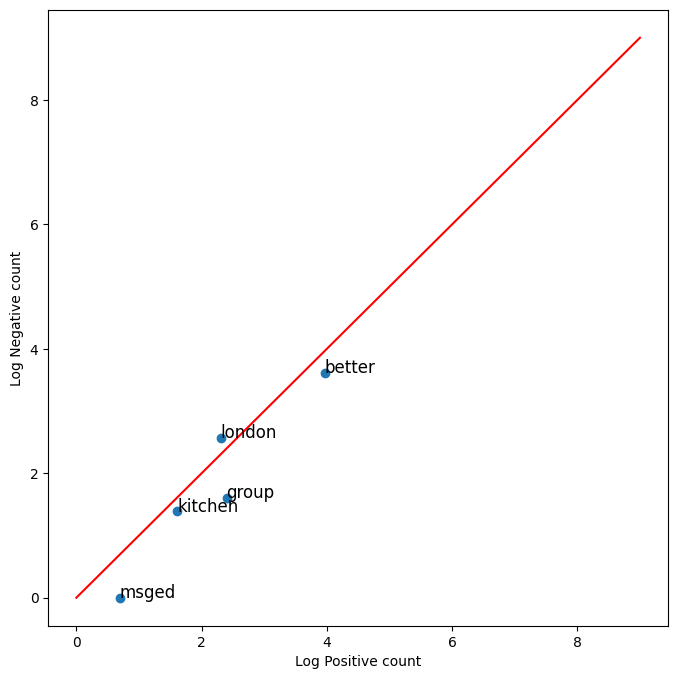

In [ ]:
# And we can plot the data using
import random


fig, ax = plt.subplots(figsize = (8, 8))

data_1 = random.sample(data, 5)

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data_1])

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data_1])

# Plot a dot for each pair of words
ax.scatter(x, y)

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data_1)):
    ax.annotate(data_1[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()

#### Logistic Regression

##### Sigmoid Function

This function regrets a probability between 0 and 1, and its mathematical form corresponds to:
$$h(x^{(i)}, \theta ) = \frac{1}{1 - e^{-\theta^{T} x^{(i)}}} $$
If the probabiblity is greather than 0.5 we define it as a positive probability, and in the other case with the probability less than 0.5 we define it as a negative probability.

So, in this case we have a matrix of $m \times 3$, where we're gonna need 3 thetas, this done in order to match the values of our X set to the Y set.

This class of learning is label _Supervised learning_, let say you have a X set, you define your $h(x, \theta)$ function and start giving it values, so you obtained $Y'$ values.

In order to macth the correct values $Y$ you must update your theta parameters, and to do this we use tha gradient descent algorithm. After many iterations you'll end up with a good set of parameteres theta, so your prediction $Y'$ should be really close to $Y$.

As the logistic fuction only return a number between 0 and 1, you must stablish a threshold, this is like a limit, and in this case is set to 0.5. If the probability is greater or equal to 0.5 then the value is set to 1, in contrary case the value is set to 0.

This allow us to confront classification tasks.

##### Cost Function

We consider the next cost function:
$$J(\theta) = - \frac{1}{m} \sum_{i = 1}^{m} [y^{(i)} \log{ h(x^{i} , \theta)} + (1-y^{(i)}) \log{(1 - h(x^{i} , \theta))} ]    $$
Note that this function is relevante for values 0 and 1

### Assigment

The corresponds assigment for this week is online [here](https://drive.google.com/file/d/1nsh60tYEiEohGMXmwRJ8b8_EFrzc5bp5/view?usp=drive_link)

## Second Week: Naive Bayes

### Probabily and Bayes'Rule

Probability is fundamental in the context of NLP, this allow us to predict values acording to how frecuent they are. For example, in certain cases words such as Happy can be associated with positive or negative sentiments, we can get the probability for Happy to be a positive or negative just counting the number of times the word has been asociated and dividing over the total corpus.

* Let's say you wanna calculate the probability of a tweet being positive, in this case is just the number of positive tweets divide it over the total corpus. And the probability of a tweet being negative will be the complementary!

* _To calculate a probability of certain event happening, you take the count of that specific event and you divide it by the sum of all events_





### Bayes' Rule & Conditional Probabilities

* _Conditional probabilities help us reduce the sample search space_

In this case, let's gonna considerar the probaiblilty of B given A happened. This means, let's say that B has already happend and this influences the probability of A for happen.

Also, this can be understood as looking at the elements of A, get the probability for B belongs to A.
$$P(A|B) = \frac{P(A \cap B )}{P(B)} $$
In this case, we say that B has already happened, what's are the odds to get A? The probability corresponds to the probability to get A in B, divide by the probabitily to get B.

Note that we can get the complementary case:
$$P(B|A) = \frac{P(B \cap A)}{P(A)} $$
From this we can get the **Bayes' Rule**:
$$P(A|B) = P(B|A) * \frac{P(A)}{P(B)} $$

### Naive Bayes

Naive Bayes is a way to predict probabilities between two objects that are merely related. In this case, we're gonna use it for sentiment classification.

In the chapter before we implement a vocabulary and a frequency dictionary, so we can get how many times a word is related to a good and a negative sentiment. In this case we're gonna use Naive Bayes in the next way:
* First, we must get the frequency for each word in good and bad sentiments, later we get the probability dividing each frequency over the total
* The next step is, using the probabiblities obtained, use the Naive Bayes Binarie Classification equation:
$$\Pi_{i=1}^{m} \frac{P(w_{i}|Pos)}{P(w_{i}|Neg)} $$
In case the value is greater that one, the tweet contains a good sentiment. Otherwise is a negative sentiment.

### Laplacian Smoothing

This is a very useful technique for avoiding probabilties going to zero. It is define as:

$$P(I|Class) = \frac{Freqs(I|Class) + 1}{N_{Class} + V_{Class}}$$

In this cases, let's take a word I belonging to a certain class, in this cases the probability correspondes to the classical frequency over the $N_{Class}$, but it was added it the numberator a 1, and in the denominator a $V_{class}$, in this cases, it denotates the number of unique words in the class, not in the vocabulary.

* Class corresponds to positive or negative

### Log Likelihood

As before, we have our vocabulary with their frequencies, we get the probability using the Laplacian Smoothing. After this process we end up with two columns.

The first one containing all the good probabilities and the other one containing all the bad probabilities, from this we can get the ratio, it's define as:
$$ratio(w_{i}) = \frac{P(w_{i}|Pos)}{P(w_{i}|Neg)} $$
From this, we define a word as neutral if its radio equals one, if it's greater that one it's positive, or if it's lower that one then is negative.





* If we have an unbalaced dataset, the correct formula in order to make predictions corresponds to:
$$\frac{P(Pos)}{P(Neg)}*  \Pi_{i=1}^{m} \frac{P(w_{i}|Pos)}{P(w_{i}|Neg)}  $$
Where the second term is usually name as *Likelihood*. This expression is done for unbalaced datasets, when the dataset is balance then the first term or *prior ratio* is just one.



* You can notice from this that we're gonna be dealing with a lot of multiplications, in order to avoid this, we use logarithms, so, the expressions is more like:

$$\log \frac{ P(Pos) }{ P(Neg) } + \sum_{i=1}^{n} \log \frac{P(w_{i}|Pos) }{ P(w_{i}|Neg) }$$

Note from this that the neutral value now became zero. And from this we define Lambda as:
$$\lambda(w) = \log \frac{P(w|Pos)}{P(w|Neg)} $$
Now we can start making predictions, given a tweet we already know the lambda values for each word in the tweet, so we can sum all the lambdas and get the prediction!

If the sum is greater than zero, then is positive, and if it's lower than zero, then is negative.


### Training Naive Bayes

In order to train a model, the following steps are required:


1.   Collect an anotate corpus (separating sets)
2.   Preprocess
3.   Creating a vocabulary and a frequency dictionary
4.   Get conditional probability using Laplacian smoothing
6.   Get the lambda core for each word
7.   Estimation of the logprior
8.   Start making predictions using Binary Classification.




### Visualizing Navie Bayes

In order to visualize Navie Bayes we often use Confidence Ellipses. A confidence Ellipse is a way to visualize a 2D random variable, this way summarize the infomation of the dataset to only four parameters: Center, Height, Width and Angle.

The center corresponds to th mean of the attributes, the angle is related to the covariance and the height and with related to the variance.



The parameter __n_std__ stands for the number of standard deviations bounded by the ellipse. Remember that for normal random distributions:

* About 68% of the area under the curve falls within 1 standard deviation around the mean.
* About 95% of the area under the curve falls within 2 standard deviations around the mean.
* About 99.7% of the area under the curve falls within 3 standard deviations around the mean.

### Testing Naive Bayes

For testing the model in unseen tweets, the tweet must be preprocess. In the case a word is not in the vocabulary, we will consider the word as neutral (0). For each prediction we must add the logprior.

So, for each tweet we must:


1.   Preproccess the tweet
2.   Get the lambda for each word in the vocabulary
3.   Get the prior-log
4.   Get the score for each tweet, this means, add all the corresponding lambdas.
5.   If the score is greater than zero, then corresponds to a good sentimente, in other case, it corresponds to a bad sentiment.
6.  Get the test set and compare them.
7.  Get the accuraccy.





### Applications of Naive Bayes

Some applications corresponds to:


*   Author identification
*   Spam filtering
*   Filtering between relevant or irrelevant documents
*   Word disambiguation
*   And, of course, sentiment analysis!

The Naive Bayes method is really fast and robust!






### Naive Bayes Assumptions:


So, this is the best model for ever right? Well, that's not really the case. In the Naive Bayes model we did certain assumptions, for example:

*   The words in a tweet are NOT related: This means that if a tweet says: It's very cold in the..., your model can predic with the same probability the word summer or winter. And we both know that's not really the case.

*   Balance Dataset: The model will work perfectly if the words are not related and also if we're giving to the model the real words we often used, but since we're taking the words from tweeter, there are not bad words, then our model doesn't predict exactly well. And also, the number of good tweet are greater that the number of negative tweets.

### Error Analysis

Naive Bayes is not the wonderful method, but it's incredible useful. So, let's talk about somecases in wich we'll find errors:

*   Puntuacion marks: If we remove puntuation as :c or !, this can led to some miscomprehension about the tweet.

*   Removing neutral words as not or this. In certain cases the word *not* can apport a lot of information about the sentiment.

*   Also certain errors can provide from the word order.

*   And finally, adversarial attacks, this mean sarcasm, Irony and Euphemisms.

All this errors appears in when our model misclassified a tweet.

### Assigment

The corresponds assigment for this week can be found [here](https://drive.google.com/file/d/16sm39ou3m5sZhkktgfcbay7Q6Guf1o68/view?usp=drive_link)


## Third Week: Vector Space Models

The main concept of this week is to learn how to represent words as vectors, and find relationships between them using Euclidian distance and cosine similarity.

### Vector Space Models

This type of representations allow us to capture similarity between words or documents, so we are now able to summarize, create chatbots, answering questions, and so on. This is done by capturing what type of information these vectos encode.

This models are very good for:

*   Information Extraction
*   Machine Translation
*   Chatbots programming

### Word by Word and Word by Doc

So, what are we saying with Word by Word? Let's consider the next sentence:

"I really love music, my love for music is greather than anything else"

From this sentence, we can get a *Co-ocurrence matrix* based on _how many times a word is repeated within a certain distance k_. For example, in the last sentence if we set a distance of k = 2, we can get:

*   (love, music ) = 2
*   (love, greather) = 0

This is because love and music are repeated two times with a distance less or equal to two words. In the opposite case, there are zero times that the word love and greather are repeated inside a distance k = 2. In this way we can get a vector with dimension n = dim(vocabulary)



In the other case, we count how many times a word appears in a specific document category. For example, the word *information* can appear 2k in economy, 4k in sciencie, and 9k in programming.

Following this way, we can get a vector representation, where the distances between vectors implies their similarities.

### Linear algebra with Numpy

If you're looking how to make linear algebra using Numpy, go to check the next [notebook!](https://drive.google.com/file/d/1l1k6kLz-sKp1KBdj3TC9D4dgdtBOp2wx/view?usp=drive_link)

### Euclidian Distance

One way to get how similar two words are is using the euclidian distance, if we have two vectores $x = (x_{1}, x_{2}),y = (y_{1}, y_{2})$ we can get the distance between them using the following formula:
$$d(x,y) = \sqrt{ \sum_{i=1}^{n} (y_{i} - x_{i})^{2} } $$
And in Python we can do this using the Numpy module and the function:


```
d = np.linalg.norm(y-x)
```




### Cosine similary

As you may notice, taking the euclidian distance is not always the best way to get similarity between two vectors, this is 'cause some vectores can be significant greater than other. In order to solve this, we can use the angle between two vectors.

If the angle is small, then the vectors are more similar, and then the cosine tends to 1. In the opposite case, if the angles is almost 90 degrees, then the cosine tends to zero. The expression to get the cosine corresponds to:
$$ x \cdot y = |x| |y| \cos \theta $$
So:
$$ \cos \theta = \frac{x\cdot y}{ |x||y|} $$

We shall consider total similarity when $\cos \theta = 1$ and total disimilarity when $\cos \theta = 0$

### Manipulating words in Vector Spaces

Let's consider four vectors:

*   USA -> $(u_{1}, u_{2})$
*   Washington DC -> $(w_{1}, w_{2})$

From this, we can get the vector $\vec{a}$ from USA to Washinton DC. And if we know the Russian vector $(r_{1}, r_{2})$, we can easily get the Moscu vector, this is done adding the vector $a$ to the russian vector.

From this, we may not get the correct Moscu vector, but we'll get a vector very close, the next step is taking the closest vector to the adding one, in a process similar to clustering.

* To get the more similar vector we used cosine similarity

* We can even say that the vector difference between France and Paris represents the concept of Capital

* A whole sentence can be represented as a vector by summing all the word vectors that conform to the sentence.

### Principal Componet Analysis (PCA)

In order to represents higher dimension vectors in two dimensions, we use the principal component analysis algorithm, this method allow us to reduce the n-dimension of a vector to only two dimensions.

* This is a topic from dimensionality reduction

* Corresponds to unsupervised learning

How it works? First we get uncorrelated features and then we take the proyection on to one axis.

How we are gonna do that? First we must get uncorrelated features, to get this we're gonna get the eigenvectors and eigenvalues from the Co-variance matrix, this is becauses:

1.   Eigenvector: Uncorrelated fatures in our data

2.   Eigenvalue: The amount of information retained by each feature.

In order to get the uncorrelated features we must normalize the data using:
$$x_{i} = \frac{x_{i} - \mu_{x_{i}}}{\sigma_{xi}} $$
Where $\mu$ represents mean, and $\sigma$ represents standar desviation.

Then we get the Co-variance matrix, and on this we perfom *Singular value decompostion SVD*. This will give us three matrices, one with the eigenvectores in columns and the second containing the eigenvalues in the diagonal.

Finally, we proyect our data, to do this we take the dot product between the data and the eigenvector matrix to a n number representing how many dimensios are desired. From this resultan vector, we get the Percentage of Retained Variance:
$$ \frac{ \sum_{i=0}^{l} S_{ii} }{ \sum_{j=0}^{d} S_{jj} } $$
Where $S$ represents the eigenvalues diagonal.

* The eigenvectors and eigenvalues must be organize in descending order acording to the eigenvalues.


Principal Component Anaylsis is a statistical techinque that uses orthogonal transformations to map a set of variables into a set of linearly uncorrelated variables, denomited as Principal Components. To get this values we used SVD, where the resultant eigenvectors correspond to a rotational matrix.



If we're looking for use PCA in Python, we can use the library ScienceKit and the function PCA:



```
pca = PCA(n_componets = 2) # Final Dim
pcaTr = pca.fit(data)
rotatedData = pcaTr.transform(data)
```

In this case, the function fit will get the rotation matrix, and the transform function will apply the rotation matrix into our data. From this, we can get the eigenvectors and eigenvalues using

```
pcaTr.components_
pcaTr.explained_variance_
```



Before finish this topic, I want to share with you fundamental concepts, if you have a matrix of (n,m), where $n$ is the vector index and m its characteristics, then :

1.   When getting the mean, the mean must be for each COLUMNS, this is 'cause the caracterists are in each column and we must the mean on that ones.

### Numpy resources



The following Numpy resources are fundamental when doing PCA:

*   [Covariance Matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html)
*   [Mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)
*   [Eigenvalues and eigenvectors](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html)

### Assigment

The correspondg assigment for this week can be found [here](https://drive.google.com/file/d/1_LBn95o-RknD12sbvAy1tojW88daWIE9/view?usp=drive_link)

## Four Week: Machine Translation and Document Search

This week is about to learn how to transform word vectors and assign them to subsets using locality sensitive hashing! The aim for this week is to learn how to perform machine translation.

Also, how to implement document search, in resume:

* Transform vector
* K nearest neighbors
* Hash tables
* Divide vector space into regions
* Locality sensitive hashing



### Transforming word vectors

In this week we're looking for develop a first translation machine. In order to do this, first we must find a transformation that takes the word vector in one language and returns the word vector in the other language.

So, if our first set is X and the second is Y, we're looking for a transformation R that:
$$ XR = Y $$


To get this matrix, we start with a random R matrix and minimize the value
$$Loss = |XR - Y|_{F}^{2} $$
We minimize this value by taking the derivate:
$$d_{R} Loss = \frac{2}{m} (X^{T}(XR- Y)) $$
$m$ denote the rows. And apply it the gradient descent algorithm.
$$ R = R - \alpha *  d_{R} Loss $$
* In this case, note that we define the norm of a matrix using the Frobenius norm: Take the square root of the sum of squared elements. In Python this looks like:


```
# A is a matrix
A_squared = np.square(A)
A_Frobenious = np.sqrt(np.sum(A_squared))
```



**Some tips about rotation matrixes:** A rotation matrix is define as:
$$ R={\begin{bmatrix}\cos \theta &-\sin \theta \\\sin \theta &\cos \theta \end{bmatrix}} $$
This take the angle (in radians) and allow us to rotate vector in a counterclock direction according to:
$$v_{n} = R \cdot v_{n}^{T} $$
Note that if our vector is an row vector, then we must take the transpose vector.

* The rotation over a vector doesn't change its norm.
* The norm of matrix rotation is always $\sqrt{2}$

### K-nearest neighbors

In order to find the more similar vector we can iterate over the whole vector space, but this will be time and resources consuming. To solve this, we implement *hash tables!*

#### Hash tables and hash functions

When we have a list of items and we're looking to organize them, we can separate them into buckets. So, hashing is the same process, we assing numbers to a hash (very similar to an index).

The function that assing a vector to a hash value is denoted as Hash Function(vector).

If we have a collection of numbers, we can assign them a hashing number using the module in this way:
$$H(n) = \mod(n, n_{b}) $$
Where $n_{b}$ is the amout of buckets. So, with this idea we can create a table containing the hash number and the values assing to it.

And if we're looking for a Python Implementation for a hash table:

```python
def basic_hash_table(value_l, n_buckets):
  
  def hash_function(value, n_buckets):
    return int(value) % n_buckets

  hash_table = {i:[] for i in range(n_buckets)}

  for value in value_l:
    hash_value = hash_fuction(value, n_buckets)
    hash_table[hash_value].append(value)

  return hash_table

```

* Note that a hash function takes data of arbitrary size and maps it to a fixed value.



#### Locality sensitive hashing

As we're looking for a way to agroup vectors who are close to each other, we're gonna be implementing the Locality sensitive hashing method. This method allows you to hash similar inputs into the same bucket with high probability. How can we divide a vector space into regions and say which vectors are in each side?

We can, in fact, divide a vector space using planes, so we can say if a vector is above, under or over the plane. To define a plane we often use a vector perpendicular to that plane, so, we can calculate the dot product between the normal vector to the plane and any vector.

The result will be positive if the vector is in the same direction as the normal, negative if it is in the opposite direction and zero if the vector is on the plane.

* The dot product is taking the projection of a vector over the normal, if it's pointing in the same direction is positive, in the opposite direction is negative, or if it's perpendicular then is zero.

So, we can define the next function:
```python
def side_of_plane(P, v):
  dot = np.dot(P,v.T)
  sign = np.sign(dot)
  scalar = np.asscalar(sign)
  return scalar
```

And you may be wondering, how we combine all this with multiple planes? For each plane we define the next rule:
* Given an j-plane, if the dot product between the normal vector to the plane and any vector if greater or equal than zero, then we assing the number 1. If it's lower than zero, then we assing it the number 0.
* For each plane we compute the next hash:
$$hash = \sum_{i=0}^{n} 2^{i} * h_{i} $$
Where $n$ is the total amout of planes, and $h_{i}$ is the associated hash value. And we can get the next function:
```python
def hash_multiple_plane(P_l, v):
  hash_value = 0

  for i, P in enumerate(P_l):
    sign = side_of_plane(P, v)
    hash_i = 1 if sign >= 0 else 0
    hash_value += 2**i * hash_i

  return hash_value
```


### *Important tips*

* Hash tables are data structures that allow indexing data to make lookup tasks more efficient.

* To create random planes we can use:


```python
random_planes_matrix = np.random.normal(
                       size=(num_planes,
                             num_dimensions))
```

* To get the hash when using multiples planes we can use:


```python
def hash_multi_plane_matrix(P, v, num_planes):
    sides_matrix = side_of_plane_matrix(P, v) # Get the side of planes for P and v
    hash_value = 0
    for i in range(num_planes):
        sign = sides_matrix[i].item() # Get the value inside the matrix cell
        hash_i = 1 if sign >=0 else 0
        hash_value += 2**i * hash_i # sum 2^i * hash_i
        
    return hash_value
```

* The more regions we have, the higher accurate the model will be, but the slower the search will be.



### Approximate Nearest Neighbors

In order to find which vector is more similar to other vector we divide the vector space into multiple subregions. As we can't know which planes are the best to divide the space, we'll create a set of randoms planes.

For each plane, we'll get the side of the vector and compute the hash number. So, this technique is denote as Approximate 'cause we're not looking in the entire space, just in a subregion of it.

* We're loosing precision in order to gain efficiency.

We define de cosine distance as:

$$d_{cos} (u, v) = 1- \cos{(u,v)} $$




### Searching documents

Let's say we got a document composed by 15 words. We can get a vector for each word and then add them to get a vector representing the whole document. Then we can repeat this process for each document and find which documents present similar meaning.

### Assigment


The related assigment can be found [here](https://drive.google.com/file/d/1AsJALIEUkM6RyM6QrTM_SZwHPNYnOzKU/view?usp=drive_link)

## Extra resources

### [Linear Algebra with Numpy!](https://drive.google.com/file/d/1l1k6kLz-sKp1KBdj3TC9D4dgdtBOp2wx/view?usp=drive_link)

### [Words Embeddings](https://drive.google.com/file/d/1eLKXyUeGFUb0THsOpI7iSHUlaTF1cmy_/view?usp=drive_link)

#Natural Language Processing with Probabilistic Models

The main object for this section corresponds to:
* Learn about autocorrect
* Minimum edit distance
* Dynamic programming

## Week 1: Autocorrect

This week is about Autocorrect, the main concept to learn this week corresponds to: probabilities, minimum edit distance and dynamic programming.

* Minimum edit distance: It's the minimum amount of edits to change one word into another.

### Autocorrect

 Autocorrect is the application that changes incorrect words into the correct ones. In order to do this, we implement the following steps:
 * Identify a misspelled word
 * Find strings n edit distance away
 * Filter candidates
 * Calculate word probabilities


So, let's start building the algorithm, the first step consists in identifying a misspelled word, how we can do that? Well, if a word is not in a dictionary is probably misspelled.

The second step consist in find string n edit distance, to do this we implement four operations:
* Add a character
* Delete a character
* Switch 2 adjacent characters
* Replace a character to another

What is an edit?: An operation performed on a string to change it, usually corresponds to 1-3

* We say two words are n edit distance away from each other when we need n edits to change one word into another.

With this set of operations, we'll get a list of posible strings, so we must filter the right words, so we compare again with the dictionary, this will get us a list of correct word that are candidates to be the correct word.

The last steps consist in calculate the probability for each word


*How we can create a tiny vocabulary from a sentence?*

To create a vocabulary from a sentence the steps to follow corresponds to;

1. Convert your sentence to lowercase
2. Use RegEx to separete each word
3. Implement Counter from collections lib to get a dictionary containing all the words and the frequency of each one.

So, you'll end up with all the words and their frequency.

To calculate the probabily for each word we must get the frequency of each word and the total numbers of words. Then, we define the probabily as:
$$P(w) = \frac{C(w)}{V}$$
Where $P(w)$ is the probability of the word, $C(w)$ is the number of times the word appears, and $V$ is the total number of words.

* In case we want to build a more complex model we can keep track of each word appearing next to each other.

In [ ]:
# To create a list of possible strings, we implement four edit operations:
word = 'dearz'
# Find all the ways you can split a word:
splits_b = [(word[:i], word[i:]) for i in range(len(word) + 1)] # Usually, we don't add the +1

# Find all the ways you can delete a character:
splits = splits_b
deletes = [L + R[1:] for L, R in splits if R]

# Given a Vocab, find all the correct candidates
vocab = ['dean','deer','dear','fries','and','coke']
candidates = []
edits = list(deletes)
candidates = set.intersection( set(vocab), set(edits))


In this example, *First step* consists in the creation of split list with all the possible divisions for a strings, this steps is often repeated in all the processing functions.

The *second step* consits in loop through the split list, deleting or swiping characters.

### Minimum Edit Distance

Minimun Edit Distance is the smallest number of edit operations requiered to convert one string into other. This is done by using the edit operations:
* Insert -> 1
* Delete -> 1
* Replace -> 2

We assing to each operation a cost. So, for example, if we want to convert the string Play into Stay, we need to replace two characters, so the computational cost is 4.

This technique is implemented in DNA sequencing, spelling correction and document similarity. And also allow us to evalute similarity between two strings.





_How can we know how many operations we need to implement?_

To solve this, we implemented the Minimum Edit Distance Algorithm, this algorithm allow us to find the lower number of edit operations, and corresponds to Dynamic Programming.

Given two strings $j$ and $m$, we define a matrix with lengh $(j+1, m+1)$, where the initial character for both strings is $\#$, and it corresponds to a null character.

The next step consists in taken subdivision for each strings, and couting how many edit operations are required to change the first string in the left side, to the second string in the right size. This is:

$$D[i,j] = source[:i] \to target[:j] $$
In this process, the coordinate $D[n,m] = source \to target$ wil contain the minimum edit distance. So, the matrix would be fill with the cost of each operation:
* Insert 1
* Delete 1
* Replace 2



$$
\begin{pmatrix}
 & \# & s & t & a & y \\
\# & 0 & 1 & 2 & 3 & 4 \\
p & 1 & 2 & 3 & 4 & 5 \\
l & 2 & 3 & 4 & 5 & 6 \\
a & 3 & 4 & 5 & 4 & 5 \\
y & 4 & 5 & 6 & 5 & 4 \\
\end{pmatrix}
$$


To get this matrix we implement the next correlactions:

$$D[i,j] = D[i-1, j] + DeleteCost $$
$$D[i,j] = D[i, j-1] + InsertCost $$
$$D[i,j] = D[i-1, j-1] + Val\theta_{2, 0} $$
In this case, $Val\theta_{2,0}$ depends on the value of the source and the target, in case they're equal, then is 0. In case they're different the value is 2 corresponding to the replacemente cost.

From all this relationships, we'll take the minimum.

* This metric corresponds to Levenshtein distance, and specifies the cost per operation.
* We can also set a pointer in each cell to get a backtrace.
* This way of solving by implemmenting a small solution to a considerable large problem and reuse it, it is know as Dynammic programming.






### Code implementations:

* Use the function Counter to get a dictionary with the word as key and the frequency as value.

* Use the method _items_ in dictionaries to get a tuple with the key and value.

* To operate the strings, the first step consists in split the word.

* We can keep a backtrace by identifying which operation leds to the next value:
** LEFT - Insertion
** DOWN - Deletion
** DIAG - Substitution

## Week 2: Part of Speech Tagging and Hidden Markov Models

Part of Speech (POS) Tagging referes to the separation of each word from a sentence to a category; like verb, noun, and so on.

To correctly model this phenomena we will use;
* Markov Chains
* Hidden Markov Models
* Viterbi algorithm





To understand the used tags we recommend: [POS-Tags](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html)

When working with text files, the next steps are widely recommended:
* Use default dict to count the words.
* Use list comprehension
* Complete your vocabulary by adding adjectives [Use Any()]

### Markov Chains

* Stochastic process refers to process with a random variable

A markov chain is a type of stochastic process that describes a sequence of events where the probability of  each event depends only on the state attined in the previous event. This property is known as the **Markov property**.

* In a Markov Chain, the future state depends only on the current state and not on the squence of events that preceded it.

* It is use to model various random processes in fields like Physics, Economics and Computer Science.

* They're used in Speech recognition.




A Markov chain may be model as a directed graph, where the state corresponds to a node and the probability corresponds to a link:

* State refers to the state or condition of the variables at the current moment.


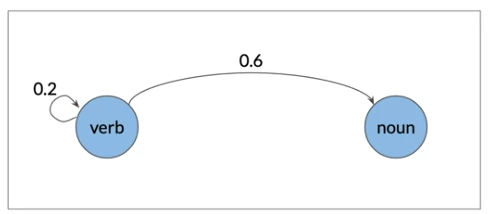

We may define a Markov Chain as a set $Q = \{ q_{1},...,q_{n} \}$ with all the possible states of the system. And the transition probability, that refers to the probability to go from one state to other, in a transition matrix $A$.

* Markov property: The next state only depends on the previous state.

* A transition matrix is a $(N+1\times N)$ matrix, where the first row corresponds to the _initial state_ of the sytem. The next rows correspond to the transition probability of each state into another.

* The sum of the probabilities of each row must be equal to 1




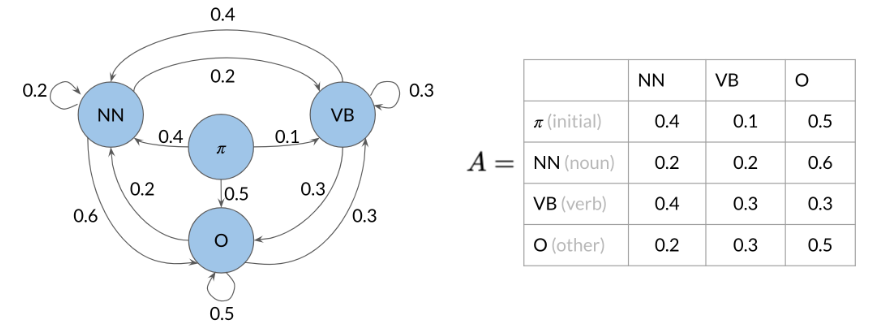

### Hidden Markov Models

A hidden Markov Model is compose by a set $Q$ of possible states, a transtion matrix $A$ and an emission matrix $B$.  

* _Why are this models label as hidden?_

Image a word like 'jump'. For us this word is a verb, but for the computer is just a word, so the state of the word is hidden for the computer.  The variables that the computer can see are label as 'observables', and the state of this variables is considered as hidden because the computer doesn't know it.


And what is an emission matrix?
Consider a hidden state, like a verb, from this we're looking for the most probable word this verb may be associated with. An emission matrix is composed by a series of rows refering to the hidden states and columns refering to the probability of each observable/word.

So, given a hidden state, we can get the most probable observable associated with it.



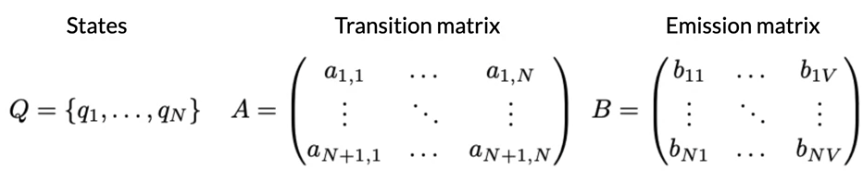

* The sum of each row is 1

 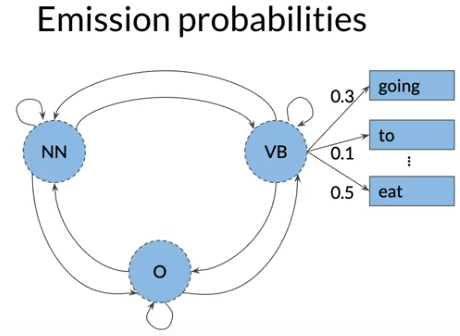

### Calculating probabilities

Consider a corpus, we want to populate the transition matrix, in order to get the probability we do the next steps:
1. Count the transitions: $a \to b$
2. Count how many the first term in the considered transition is in your corpus: $a$

This may be expresses as:
$$P(t_{i}| t_{i-1}) = \frac{C(t_{i-1}, t_{i})}{\sum_{j=1}^{N}C(t_{i-1}, t_{j}) }   $$

### Populating the Transition Matrix

To populate this matrix in the context of POS, we recommend the next steps:
1. Count the initial states
2. Count the transitions
3. Get the sum over the row, in order to normalize these values.


* In some cases, the count will be zero, so you may find a undefined value. In order to correct this, we implement **smoothing**

**Smoothing** consists in level the probability of all the matrix by adding a small value $ɛ$:

$$P(t_{i}| t_{i-1}) = \frac{ C (t_{i-1}, t_{i}) + ɛ}{\sum_{j} C(t_{i}, t_{j}) + N ɛ } $$

* In real life examples: **DO NOT APPLY SMOOTHING TO THE INITIAL PROBABILITIES**.


### Populating the Emission Matrix

In this case, we count how many times a word is associated with a state.

1. Count how many times a word appears in a give state
2. Count the total of words in the given state
3. Calculate the next probability:
$$P(w_{i} | t_{i}) = \frac{C(t_{i}, w_{i}) + ɛ }{C(t_{i}) + N ɛ} $$

### Viterbi Algorithm

The Viterbi Algorithm is based on three main steps:
1. Intilizaiton step
2. Forward pass
3. Backward pass

We initiate in the $\pi$ state and calculate the transition probability to other state, from that state we calculate the emission probability from that state to an observable.

Given the emission and transtion matrix, we can populate two auxiliary matrices $C, D$. From these steps, are now able to compute the probability of a sequence.


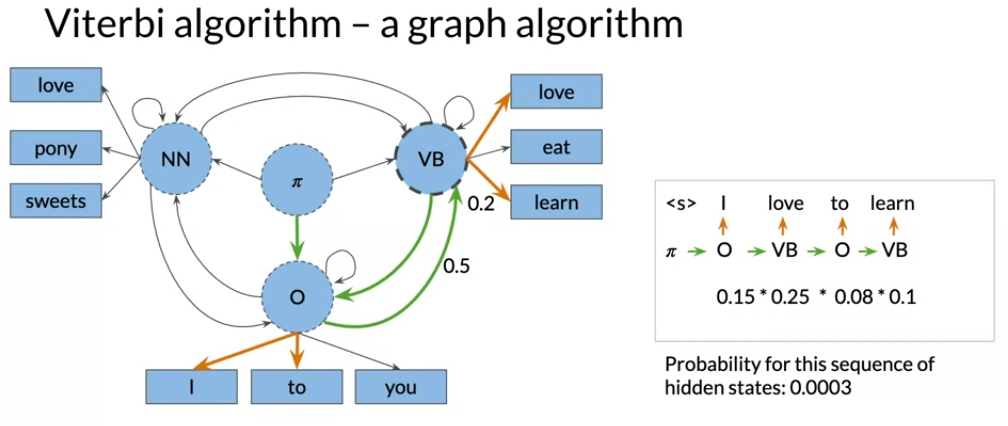

#### Initialization

Initialization is the process in which we populate the first column of the auxiliary matrices $C,D$
* The first column of $C$ represents the probability from going from the initial state to a given observable. And it is defined as follows:
$$C_{i, 1} = \pi_{i} * b_{i, cindex(w_{1})} $$
And with the correct notation:
$$C_{i, 1} = a_{1, i} * b_{i, cindex(w_{1})} $$
* The $D$-matrix, the first column is $d_{i,1} = 0$, because there's no previous state.

A recommendation is to use $\log$ operation, so the multiplication becomes a sum, avoiding then small numbers.

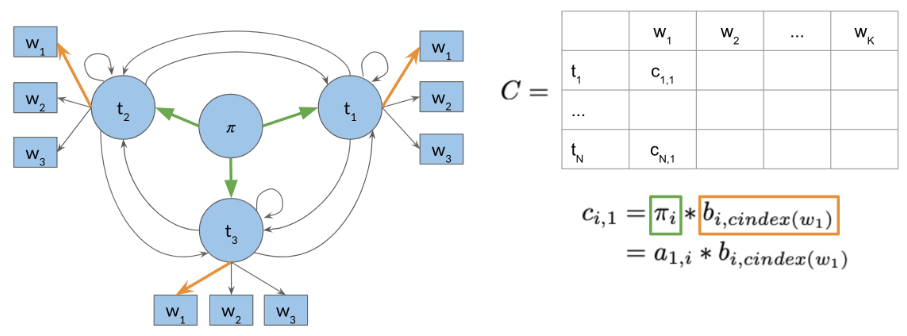

#### Forward step

The Forward step consists in populate the remaining columns of $C,D$ according to the next formulas:
* To populate $C$ we use:
$$c_{i,j} = \max_{k} c_{k, j-1} * a_{k,i} *  b_{i, cindex(w_{j})} $$
* To populate $D$ we use:
$$d_{i,j} = argmax_{k} c_{k, j-1} * a_{k,i} *  b_{i, cindex(w_{j})} $$
In these formulas, the term $b$ denotes the emission probability from the state $i$ to the word in the $cindex(w_{j})$. The term $a_{k,i}$ denotes the transition probability from going from the $k$ state to the $i$ state. Finally, the $c_{k, j-1}$ denotes the maximum probability among possible paths.

* $k$ denotes the possible paths among states.

* $D$ only stores the $k$ index.

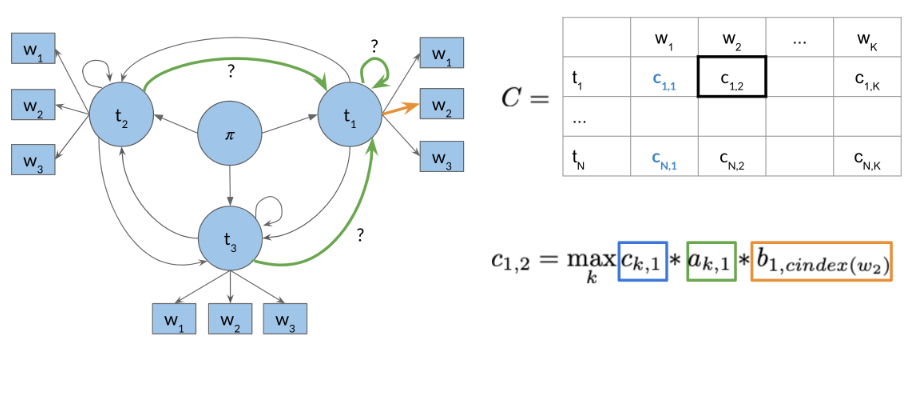

#### Backward step

This final step consists in associate each observable with its corresponding most probable state. To do this we follow the next steps:
1. With the $C,D$ complete populated. Selected the index of the last column of $C$ matrix with the highest probability. This is, in $C$ Matrix, select the last column, and get the $s$ index where the highest value is storaged.
$$s = argmax_{k} \hspace{0.3cm} c_{i,K}$$
This number $s$ represent the state of the last observable.

3. In the $D$ matrix, get the last column in index $s$, that number corresponds to the state of the $n-1$ observable and it is also index of the previous $D$ column.

By doing this iterative process, we can associate to any observable a hidden state.

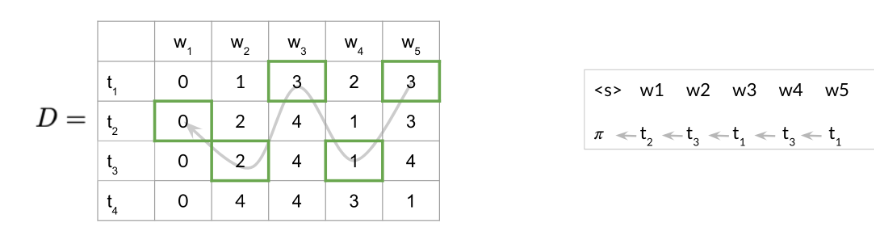

### Additional suggestions
* The probability can be really small, so use $log$ to change the multiplication for a sum.

#### Code Tips:
* Use _default dict_ to create a dictionary that returns 0 if a search for a non-existing element is done.
* Use the function _vectorize()_ to modify a function to accept numpy arrays.
* You can update the diagonal of a matrix using fill_diagonal()

## Autocomplete and Language Models

* In this week we develop an autocomplete model.

**N-Grams models**

N-Grams are fundamental concepts in NLP, they're used in Speech recognition, spelling correction, augmentative communication.

* A text corpus is a large database of text documents.

In this case, we're going to create a Language Model (LM) from text corpus to:
* Estimate probability of word sequences
* Estimate probability of a word following a sequence of words



### N-grams and Probabilities

 An N-gram is a sequence of N words. Given a corpus like 'I am happy because I am learning' we can form _unigrams, bigrams, Trigrams_ in the next way:

 * Unigrams: Split the each word individually: I, am, happy

 * Bigrams: Split the sentence by pairs: I am, am happy

 *Trigrams: Split the sentence in three words: I am happy



The notation used is the following;
* $m$ denotes the total amount of characters in the corpus

* $w_{i}$ denotes the word

* $w_{1}^{m}$ denotes the sequence of words from $w_{1}$ to word $w_{m}$



To calculate the probability of each word in a unigram we use the following expression:
$$P(w) = \frac{C(w)}{m} $$

To calculate the Bigram probability:
$$P(y|x) = \frac{C(x y)}{C(x)} $$

To compute the Trigram probability:
$$P(w_{3} | w_{1}^{2}) = \frac{C(w_{1}^{2} w_{3})}{C(w_{1}^{2})}$$

These expressions may be generalize to the following equation;
$$P(w_{N} | w_{1}^{N-1}) = \frac{ C(w_{1}^{N-1} w_{N}) }{C(w_{1}^{N-1})} $$

* Note that: $C( w_{1}^{N-1} w_{n}) = C(w_{1}^{N})$

### Sequence Probabilities

Consider the expression of the conditional probability;
$$P(B|A) = \frac{P(A,B)}{P(A)} \to P(A,B) = P(A) P(B|A) $$
This expression may be generalize to the chain rule:
$$P(A, B, C, D) = P(A)* P(B|A) * P(C|A,B)* P(D|A,B,C) $$
Note that the last term has a very small probability. To solve this issue, we consider the probability only with the last word:
* Bigram: $P(w_{n}| w_{1}^{n-1}) \approx P(w_{n}|w_{n-1})$
* N-gram: $P(w_{n}| w_{1}^{n-1}) \approx P(w_{n}|w_{n-N+1})$
* This assumption is known as the _Markov assumption_.



From these assumtions we can model the probability of a sequence as:
$$P(w_{1}^{n}) = \Pi_{i=1}^{n} P(w_{i}|w_{i-1}) $$

* Note that this is in contrast with Naive Bayes, where we approximated census probability without considering any history.

### Starting and Ending Sentences

To continue using the bigram simplified model, we must add a collection of start and end symbols to every sentence.

* In the start of a sentence, we add N-1 start symbols: $<s>$

* In the end of a sentence, we add just one end symbol: $</s>$



### Main steps in preprocessing a corpus

* Lowercasing the text: For this function we use txt.lower()
* Remove special characters: To remove especial characters: re.sub(r"[^a-zA-Z0-9.?! ]+", "", corpus)
* Split the text to list of sentences: To do this function we use split() method
* Split sentence into list words: For this we'll be using ntlk.word_tokenize(sentence)



To get an idea about how to preprocess text we recommend the next [notebook](https://drive.google.com/file/d/1cnEjJzyDJ23jqYo55PgWHKDdi6HRHE16/view?usp=sharing)

### The N-gram Language Model

To build a language model the next concepts are required:
* Count matrix: Build a square matrix with the dimension of your corpus and populate them with the counts of each word. The rows represents the first word and the columns represent the second word.

Rows correspond tto the unique corpus N-1 grams. Columns correspond to the unique corpus words.


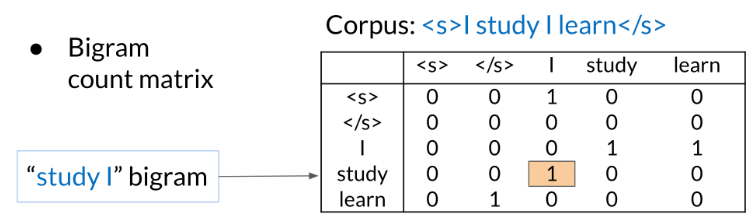

* Get the sum of each row, and divide each row by that sum. With this action you will get the probabilities of each bigram.
* To avoid small numbers when multiplying, use log()

To calculate the probabilities and the sum, we use the following expression:

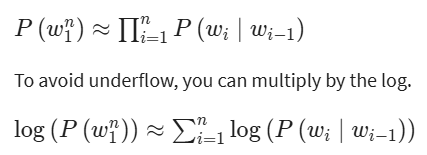

**To create a generative model** we follow the next steps:
1. Choose sentence start
2. Choose next bigram starting with previous word
3. Continue until <\s> is selected.

### Language Model Evaluation

To correctly evalute our model we need to split our text into subsets. When dealing with small data we use (80, 10, 10) for train, test, and validation datasets.

When dealing with Larger Corpora we use (98, 1, 1) for training, testing and validation.

The most common ways to split the data are:


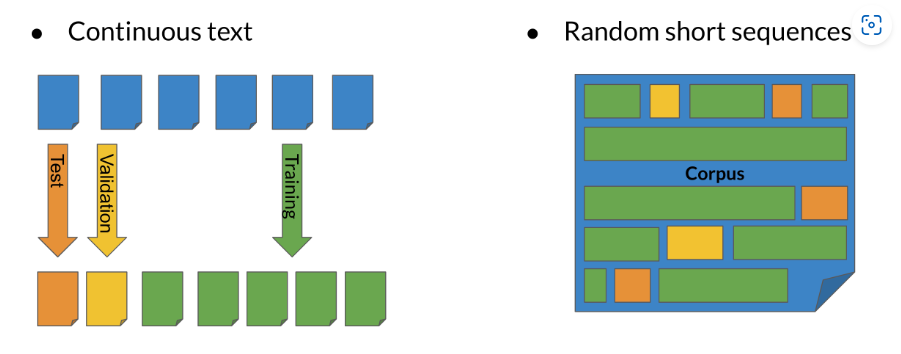

To measure the model performance we use **Perplexity**

Perplexity is used to tell us whether a set of sentences look like they were written by humans rather than by a simple program choosing words at random. A text that is written by humans is more likely to have lower perplexity, where a text generated by random word choice would have a higher perplexity.

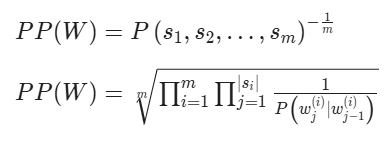

Where $W$ is the test set containing $m$ sentences $s$.

$s_{i}$ is the i-th sentence in the test set, each ending with <\s>.

$m$ is the number of all words in entire test set $W$ including <\s> but no including $<s>$

We commonly use the log perplexity to avoid underflow, defined as:

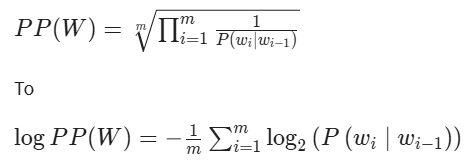

* Perplexity is very similar to entropy
* Smaller perplexity -> better model

### Out of Vocabulary Words


A **vocabulary** is a set of unique words supported by your language model.

* A closed vocabulary is a set where all the generated response are given by the elements in the set.

* An open vocabulary is when we may encounter some unknwon words in the task we are performing.


To generate a vocabulary we often use the following techniques:
* Min word frequency f
* Max |V|, include words by frequency
* Use $<unk>$ sparingly
* Perplexity - Only compare LMs with the same V

And the next steps are often use to create a vocabulary:
* Create a vocabulary V
* replace any words in corpurs and not in V by $<unk>$
* Count the probabilities with $<unk>$ as with any other word.

### Smoothing

As the probabilities for certain words in our N-gram may be zero, we want to apply a smoothing technique to avoid those values.

The laplacian smoothing is known as:
$$P(w_{n} | w_{n-1}) = \frac{ C(w_{n-1}, w_{n}) + 1 }{ C(w_{n-1} + V } $$
And the Add-K smoothig is defined as:
$$P(w_{n} | w_{n-1}) = \frac{ C(w_{n-1}, w_{n}) + k }{ C(w_{n-1} + V*k } $$

The associated notebook were an autocomplete program was implemented may be consulted in the following [notebook](https://drive.google.com/file/d/1TMkoARr7lCiYxxg1KXiDca1p-bNpjKXV/view?usp=drive_link)

## Week Four: Word Embeddings

Word embeddings are a type of word representation that allows words with similar meaning to have a similar representation. In the context of natural language processing, they transform words into fixed-length, dense vectors of real numbers. These vectors capture semantic relationships between words, so words with similar meanings (like "king" and "queen" or "dog" and "puppy") have embeddings that are closer together in the vector space.


### Key Points about Word Embeddings:

1. **Dimensionality Reduction**: Word embeddings condense high-dimensional data (like thousands of unique words) into a lower-dimensional space (often 50–300 dimensions) without losing much of the contextual meaning. This makes it computationally efficient and practical to handle large vocabularies.

2. **Semantic Relationships**: They capture semantic and syntactic patterns. For instance, the relationship between "king" and "queen" is similar to that between "man" and "woman." Mathematically, this relationship can be represented by vector arithmetic, where you might find something like:
   
   $$
   \text{embedding}(\text{king}) - \text{embedding}(\text{man}) + \text{embedding}(\text{woman}) \approx \text{embedding}(\text{queen})
   $$

3. **Training**: Word embeddings are typically learned from large text corpora through methods like **Word2Vec** (CBOW and Skip-gram models), **GloVe** (Global Vectors for Word Representation), and more recently, embeddings from transformer models like BERT or GPT.

4. **Contextuality**: Traditional word embeddings assign a single vector per word. However, newer methods like **BERT** and **GPT** use contextual embeddings, where the representation of a word changes depending on the surrounding words, capturing context-specific meanings.

5. **Applications**: They’re widely used in NLP tasks like text classification, machine translation, sentiment analysis, and more. Since they create a dense and continuous representation of words, they can improve model performance by capturing subtle relationships in language.

In summary, word embeddings help machines understand and process language by providing meaningful vector representations of words based on their context and relationships.

### Word Embeddings

Word embeddings or word vectors are a mathemical representations of words that can be used to train deep learning models for machine translation, information extraction, question answering, semantic analogies and similarity, sentiment analysis and classification of customer feedback among others.

* Words embeddings are a fundamental topic in NLP

**What are the basic representation of Word vectors?**

The main representations corresponds to:
* Integers
* One-Hot
* Word Embeddings




If we use integers, then there's no relation between words, due to the word 'a' at position 100 is not correlated with the word 'apple' at position 101. We could try to use One-Hot encoding for the words as we used for classification tasks, but in this case we requiere high dimensional vectores with length up to 1M, converting this purpose into non-practial for computing.

Word Embeddings aim to fix that, by using a relative low dimension V, they can capture meaning concepts. Consider the next representation:

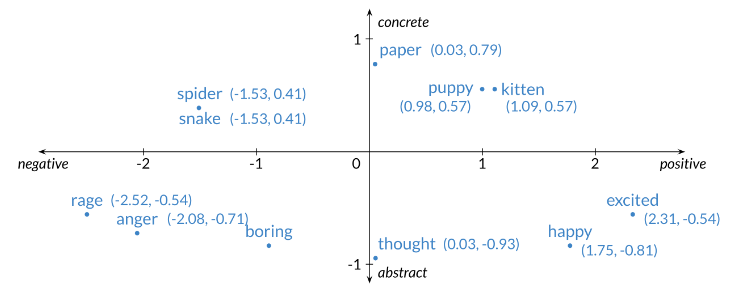

In this case, we are assining to a 2D vector the meaning about positive and negative in one entry, and in the other we are assining the meaning about concrete and abstract objetcs with real numbers. By doing so, we can represent words in a hiper-dimensional space, the most similar the words are, the most closer they will be.

### How to create word embeddings?

To create word embeddings we need a corpus of text and an embedding method. The corpus must proportionate the majority of context.

->**Embeddings**

The method used to learn the word embeddings corresponds to machine learning. In this case, the word embeddings are a subproduct of the the main purpose, this purpose could be predict a word based on the surroding words in a sentence, as in the case of the continuos bag-of-words.




* This case is denominated as _Self-Supervised_ because the input data is unlabelled (unsupervised), but the data itself provides the necessary context which would ordinaryly make up the labels.

* This method requieres hyper parameteres tuning, such as the dimension of the vectors.

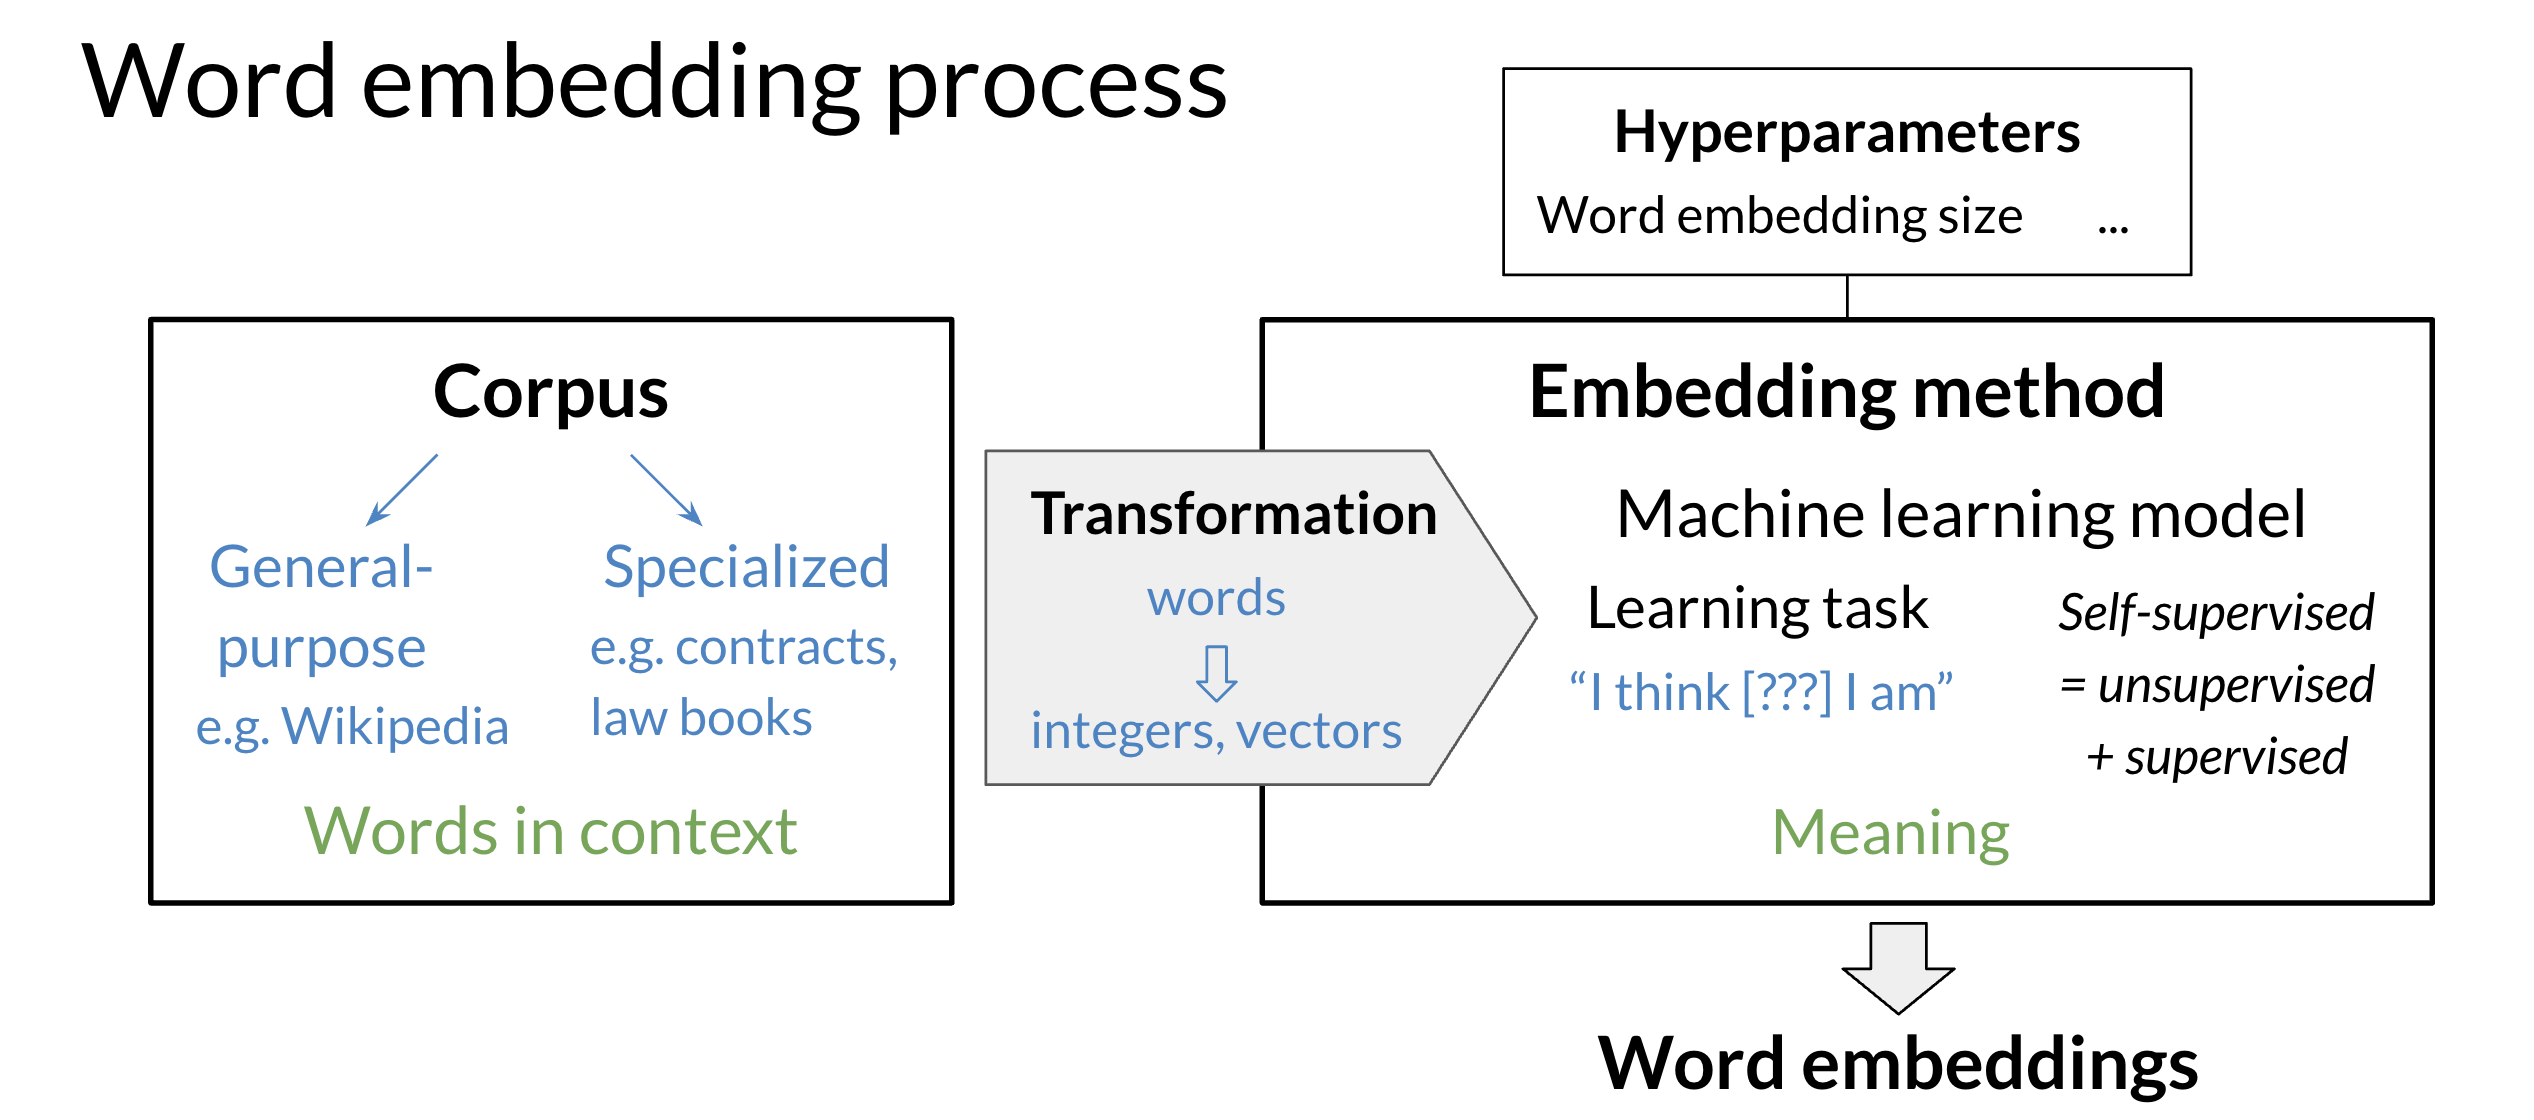

### Word Embedding Methods

Let's consider the Classical Methods for word embeddigs:

1. word2vec (Google, 2013): Uses a shallow neural network.
  2. Continuos bag-of-words (CBOW): The models learns to predict the center word given some context words
  3. Continuos skip-gram/ Skip-gram with negative sampling (SGNS): The model learns to predict the words surronding a given input word.

4. Global Vectors (GloVe) (Standford, 2014): Factorizes the logarithm of the corpus' word co-occurence matrix, similar to the count matrix

5. fastText (Facebook, 2016): based on the skip-gram model and takes into account the structure of words by representing words as an n-gram of characters. It supports OOV words. With this model, word vectors can be average to form sentences.

And the newest methods base on Deep Learning approches, these models work by having different embedding for each word depending on the context.
1. BERT (Google, 2018)
2. ELMo (Allen Instute for AI, 2018)
3. GPT-2 (OpenAI, 2018)



## Continuos Bag-of-Words Model

* To create a word embeddings, you need a corpus and a learning algorithm.

In the CBOW model, the takst is to predict a missing word based on the surrounding words.

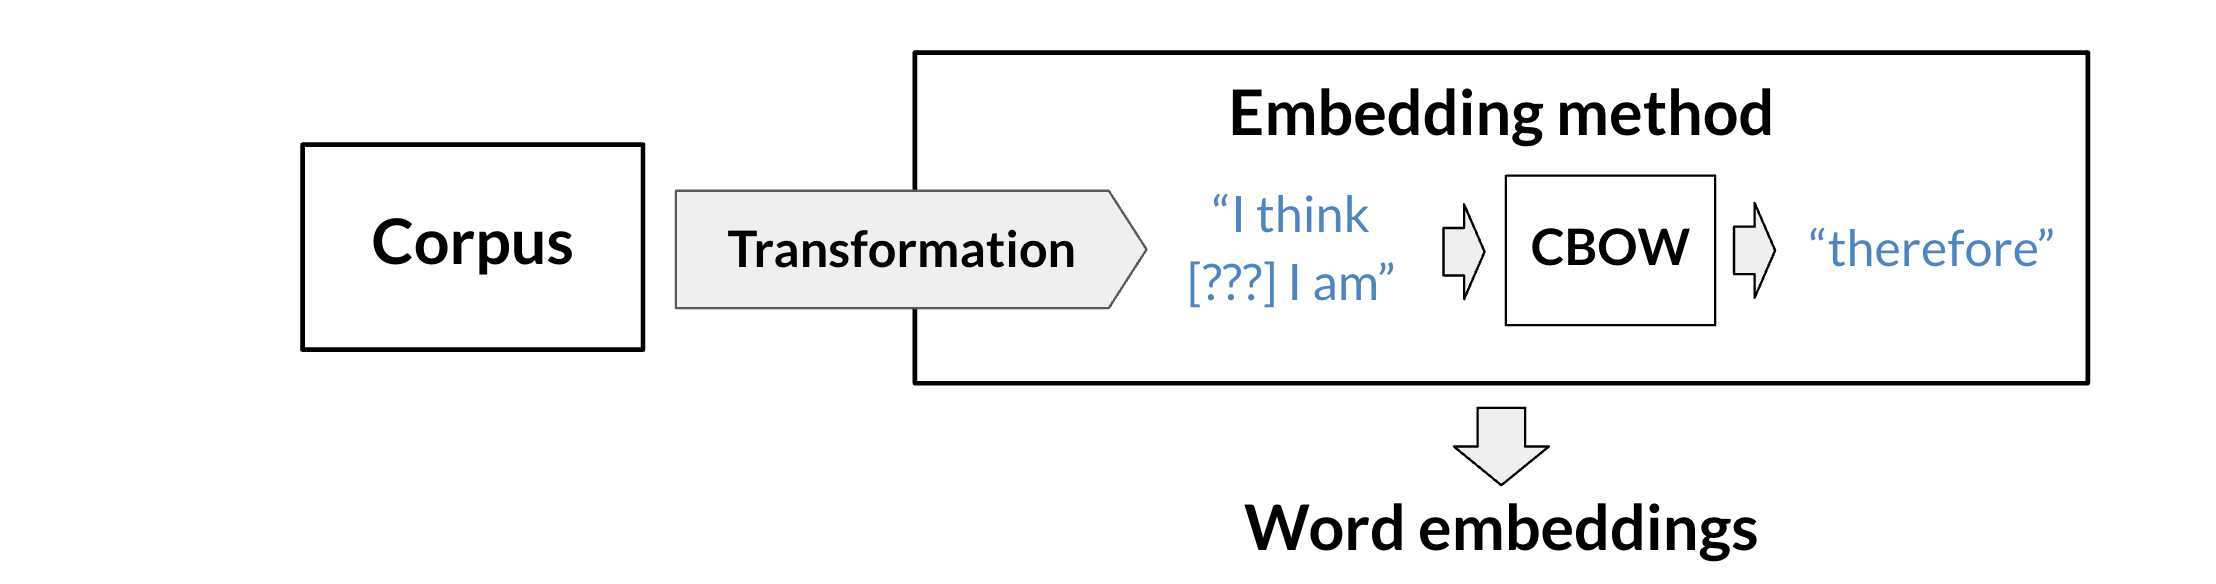

To predict the missing word we consider the _context half-size_ $C$, that referes to the number of words that are before and after the missing word:

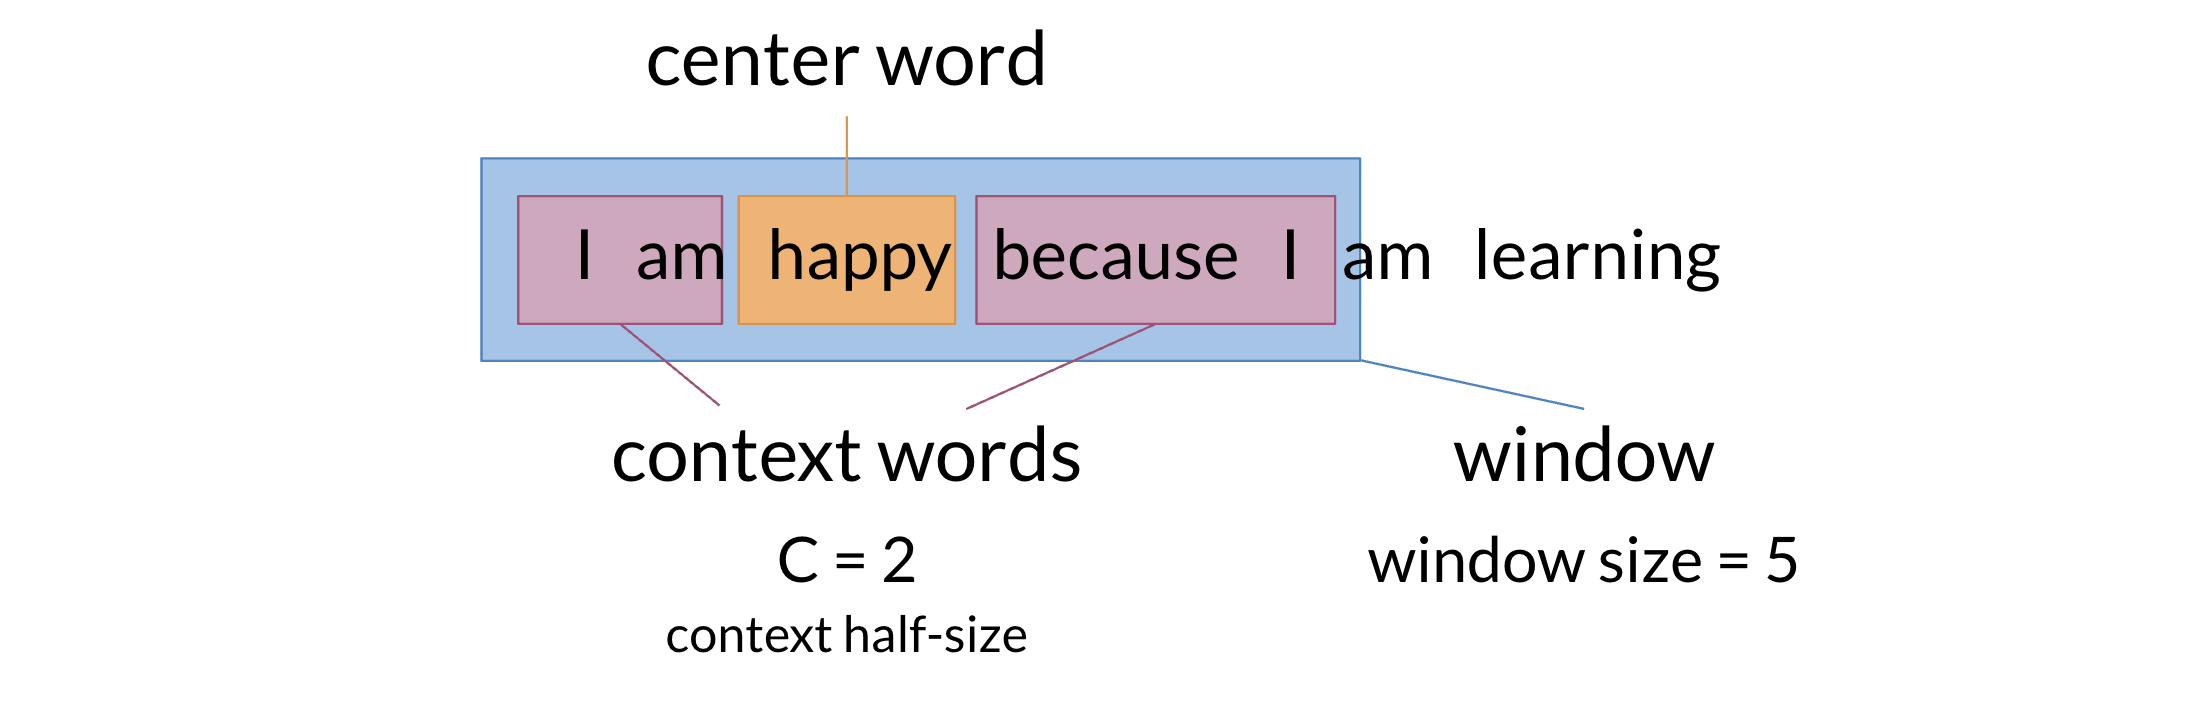

* The _window size_ number refers to the total number of words that are being considered, including the missing word.

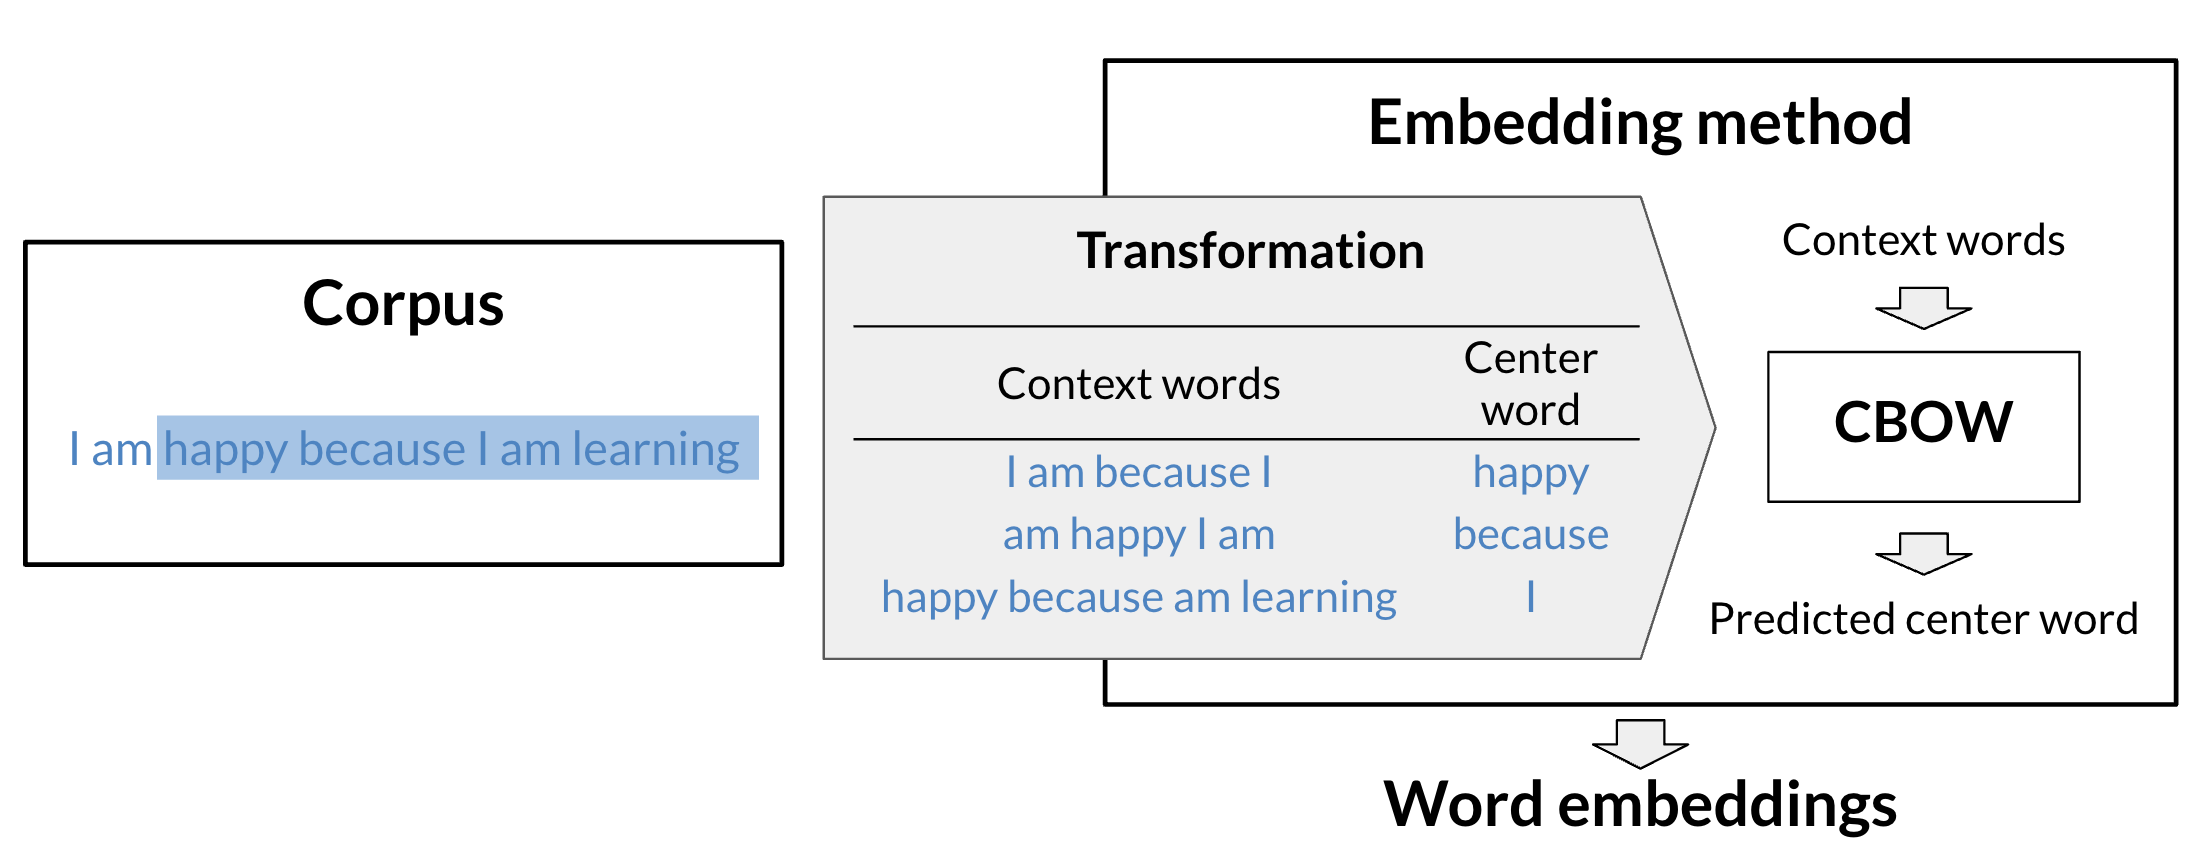

As you can see in the image above, from the corpus we generate a new set by means of a transformation. In this case we are generating the input sentence and tryining to predict the center word.

## Cleaning and Tokenization

One fundamental part of the NLP algorithms consist in the data processing. In this case, we follow the next steps in order to clean our data:

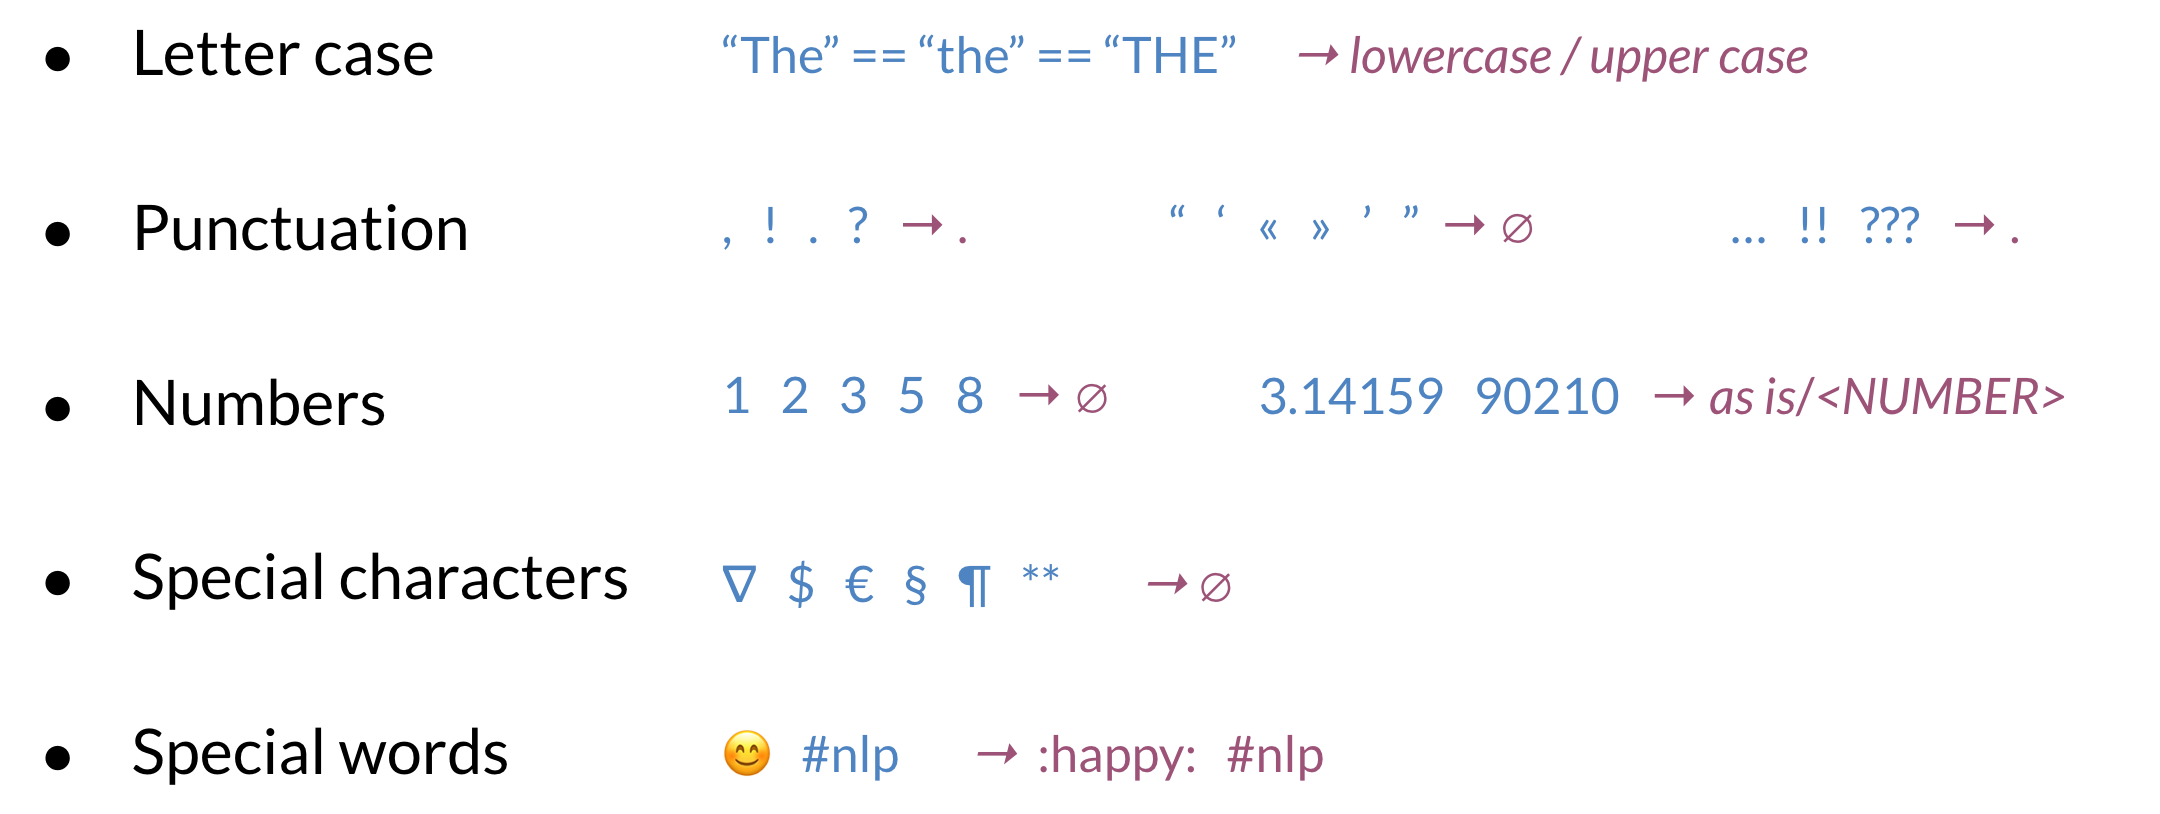

You may use the following Python code:

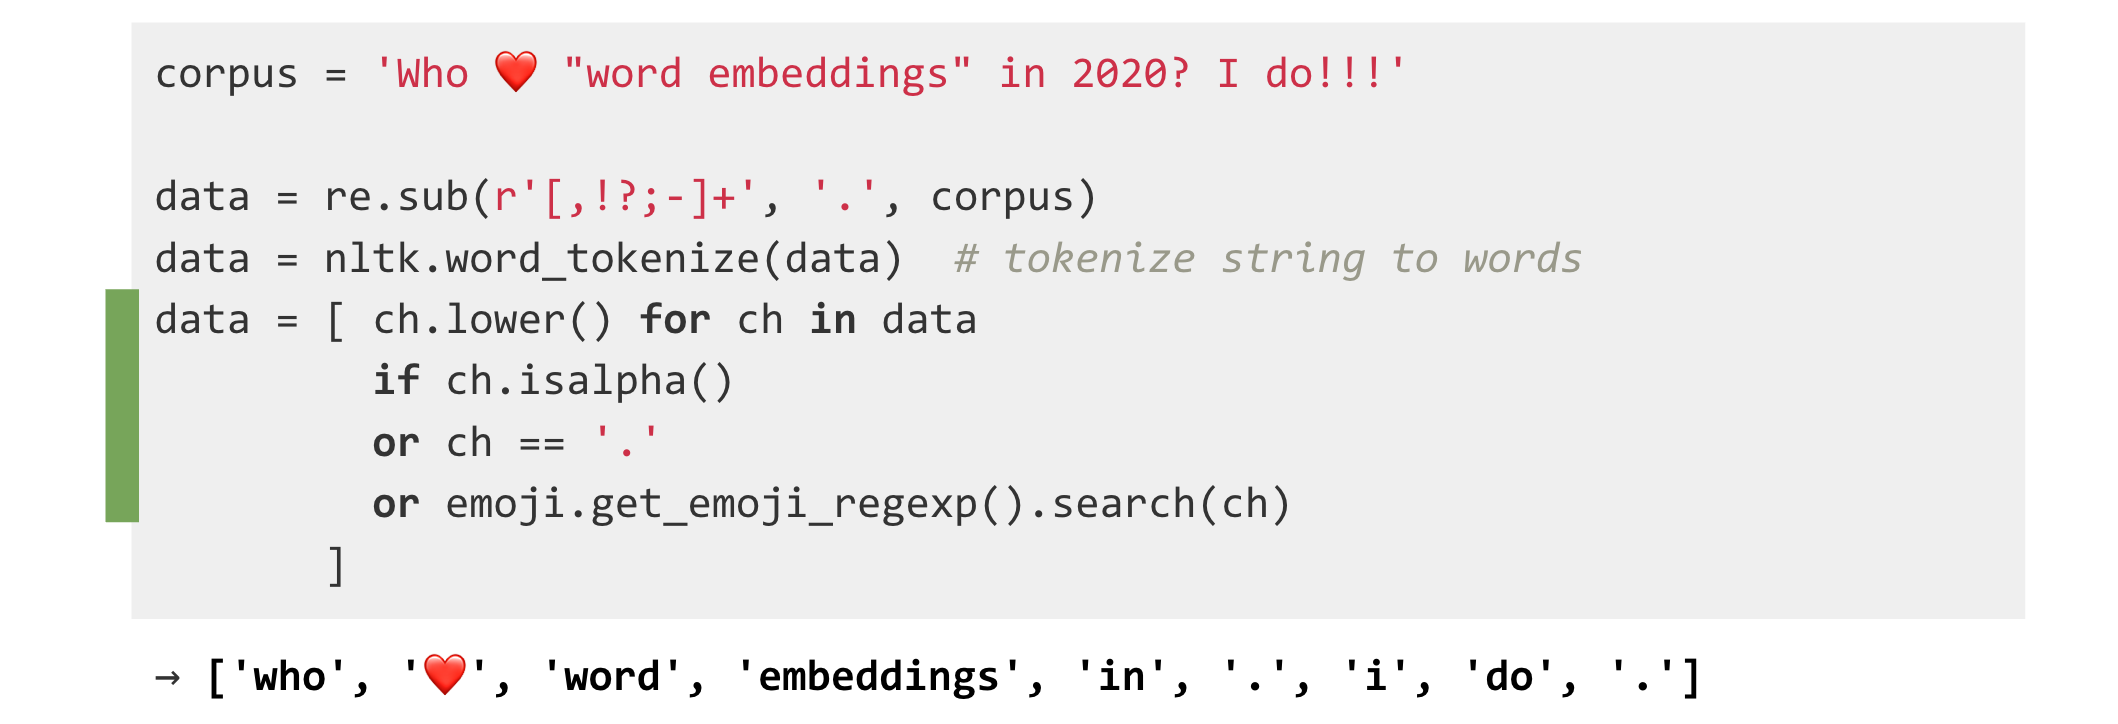

## Sliding Window of Words

To process our corpus into context and center words, we are gonna use the next function:

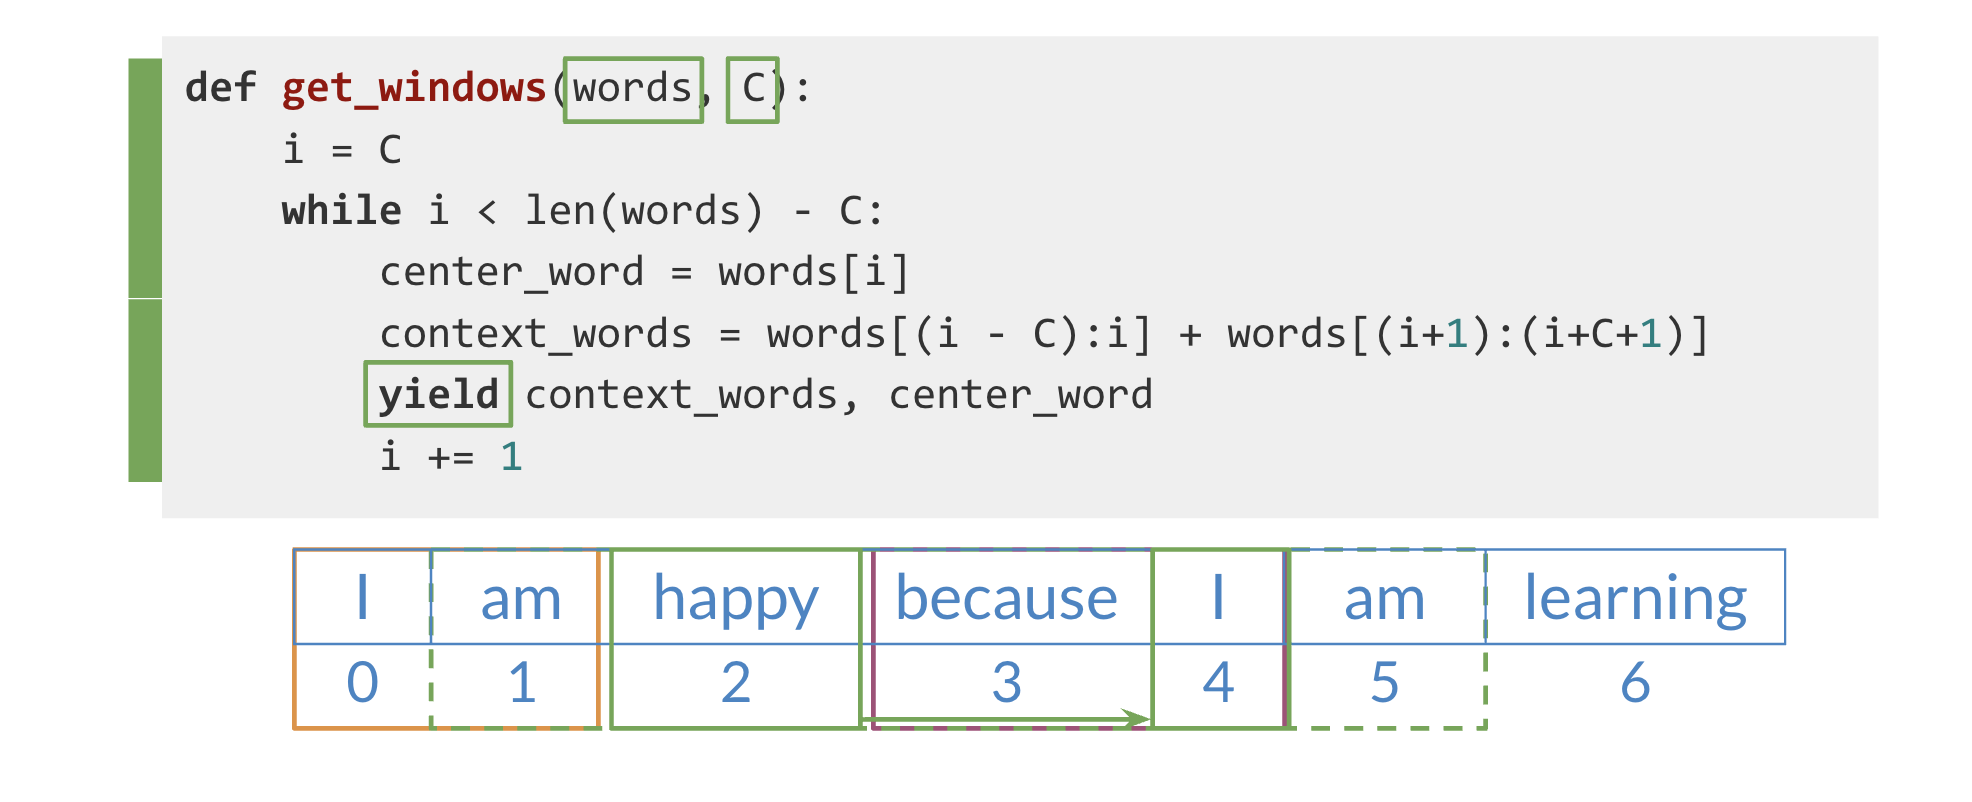

The parameters corresponds to words (corpus) and the context parameter $C$

## Transforming Word into Vectors

To convert words into vectors we first create a vocabulary. Each word in the vocabulary is then associated to a One-Hot representation. To represente complete sentence we add each of the O-H representations of the words and average them.

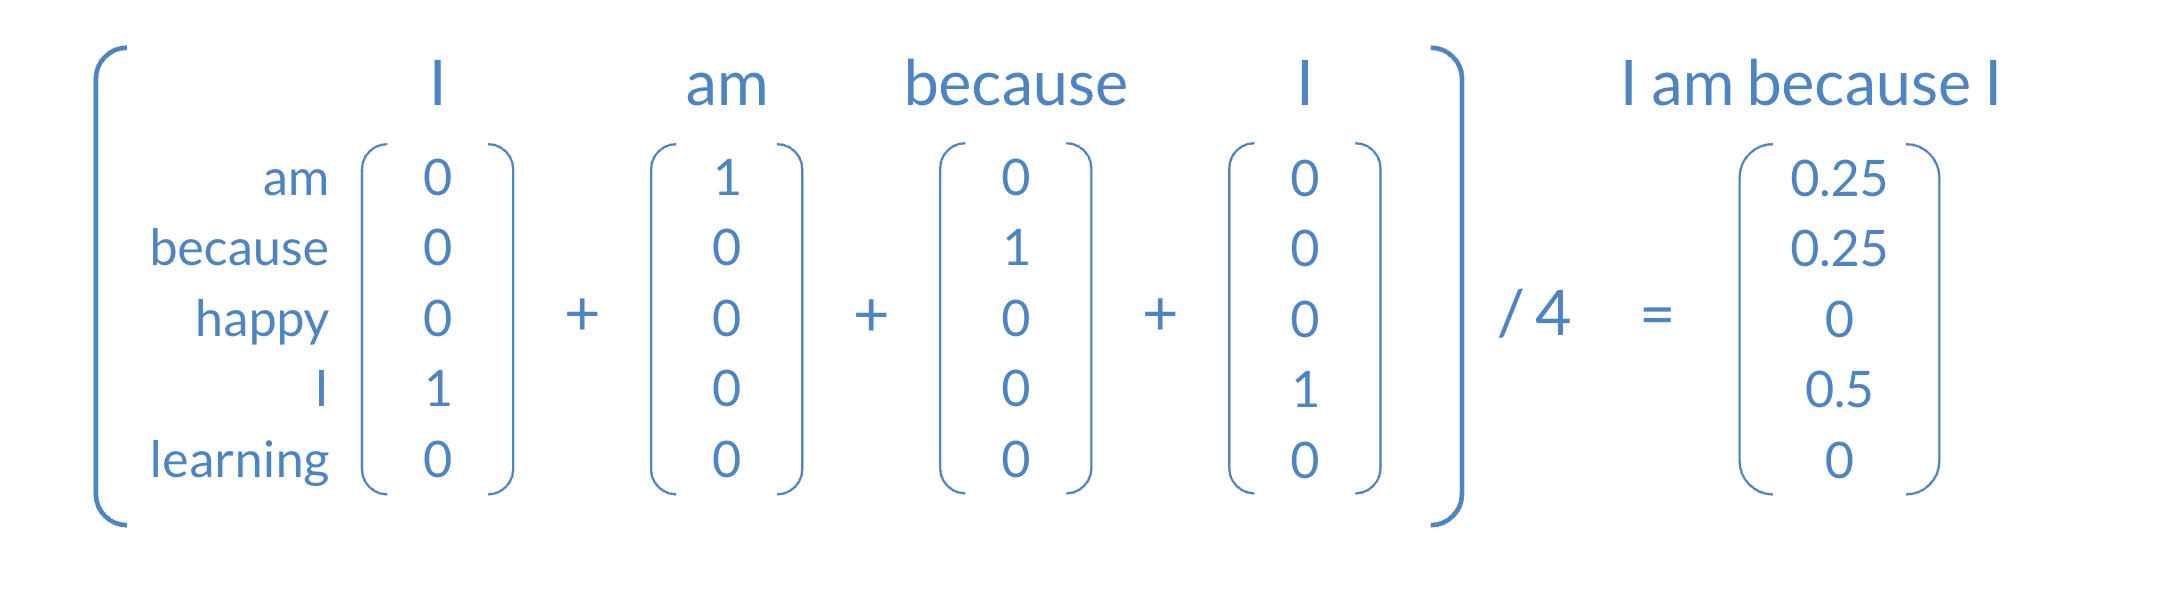

In this [notebook](https://drive.google.com/file/d/15qCL_oQhb9ALBaMGpLyjFSt-VR-_M3Ak/view?usp=drive_link) you will find the function implemented.

## CBOW Model

 The CBOW model or Continuos Bag Of Words is based on a Dense model. This model consists in one input layer with V dimension, one hidden layer with N dimension corresponding to the Embedding dimension and an output layer with V dimension.

 The functions inside each layer corresponds to ReLu and Softmax.

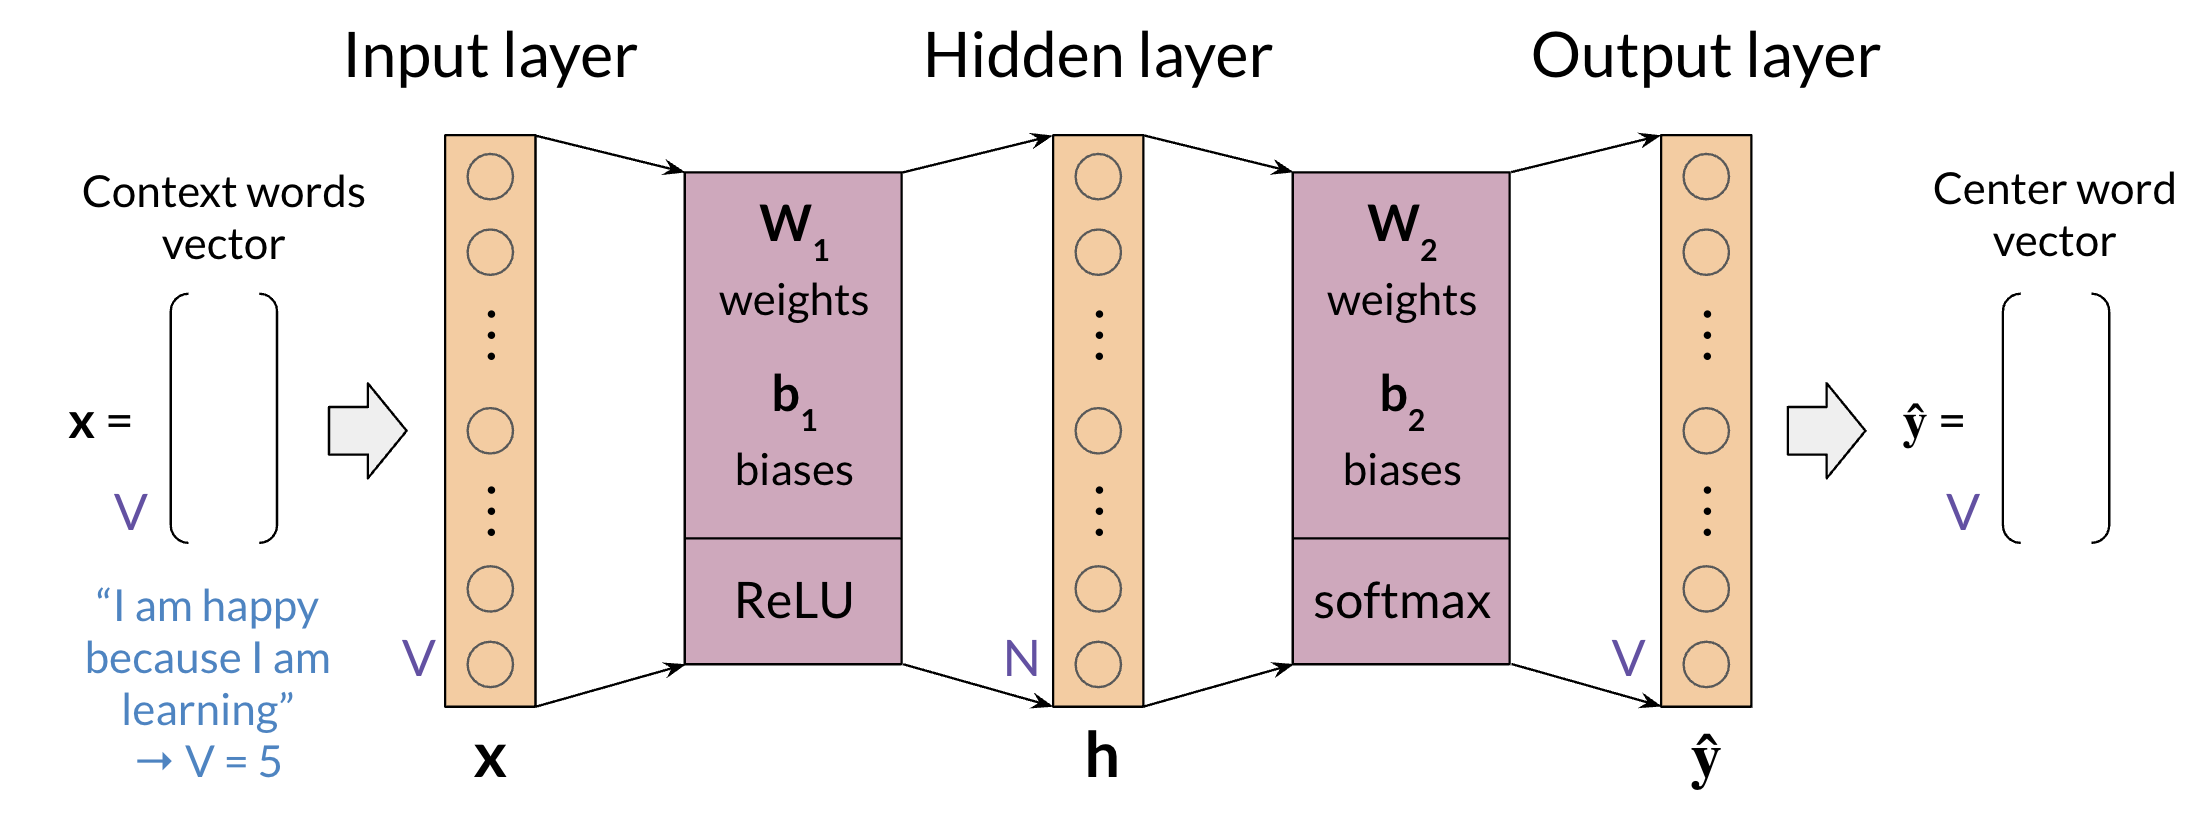

The dimensions of each layer, considering the input vector as a column vector, corresponds to:

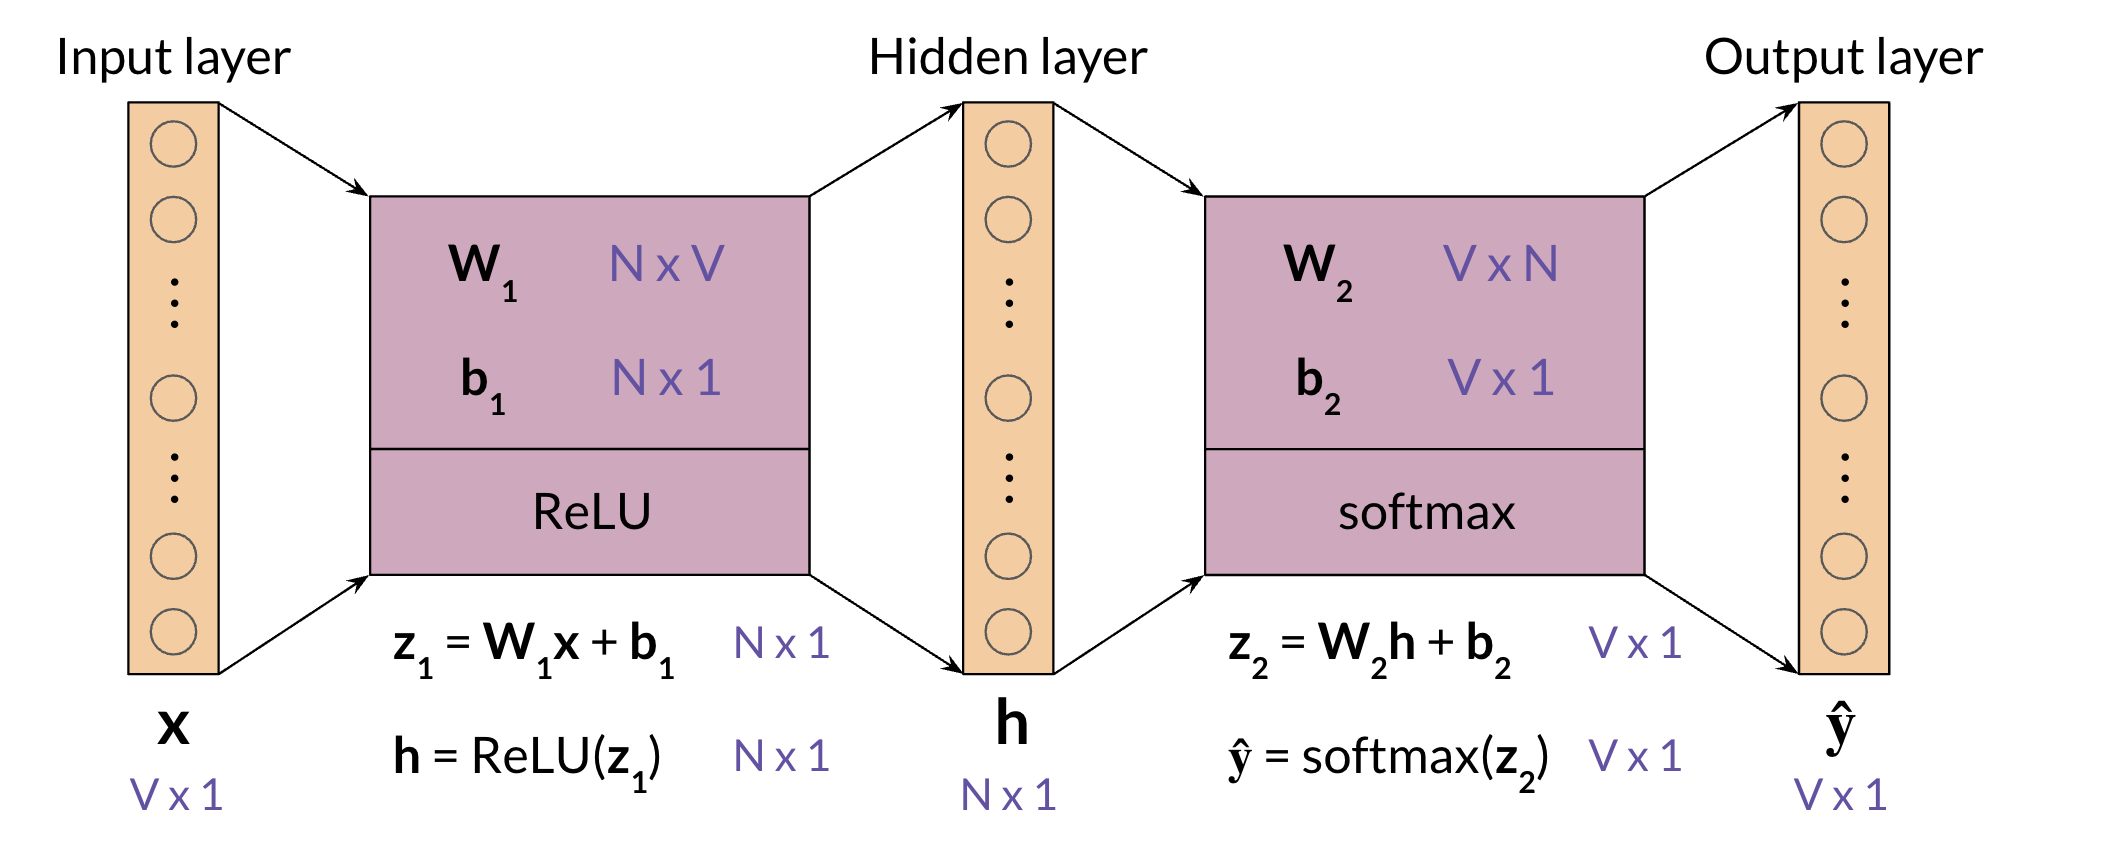

* The values in Z2 are sometimes referred to as loggings

We can fed the model using multiples inputs at a time, this is known as Batch. The Batch corresponds to the number of samples that are fed into the model at once.

So, in this case the dimension of each parameter changes with the batch size $m$ according to:

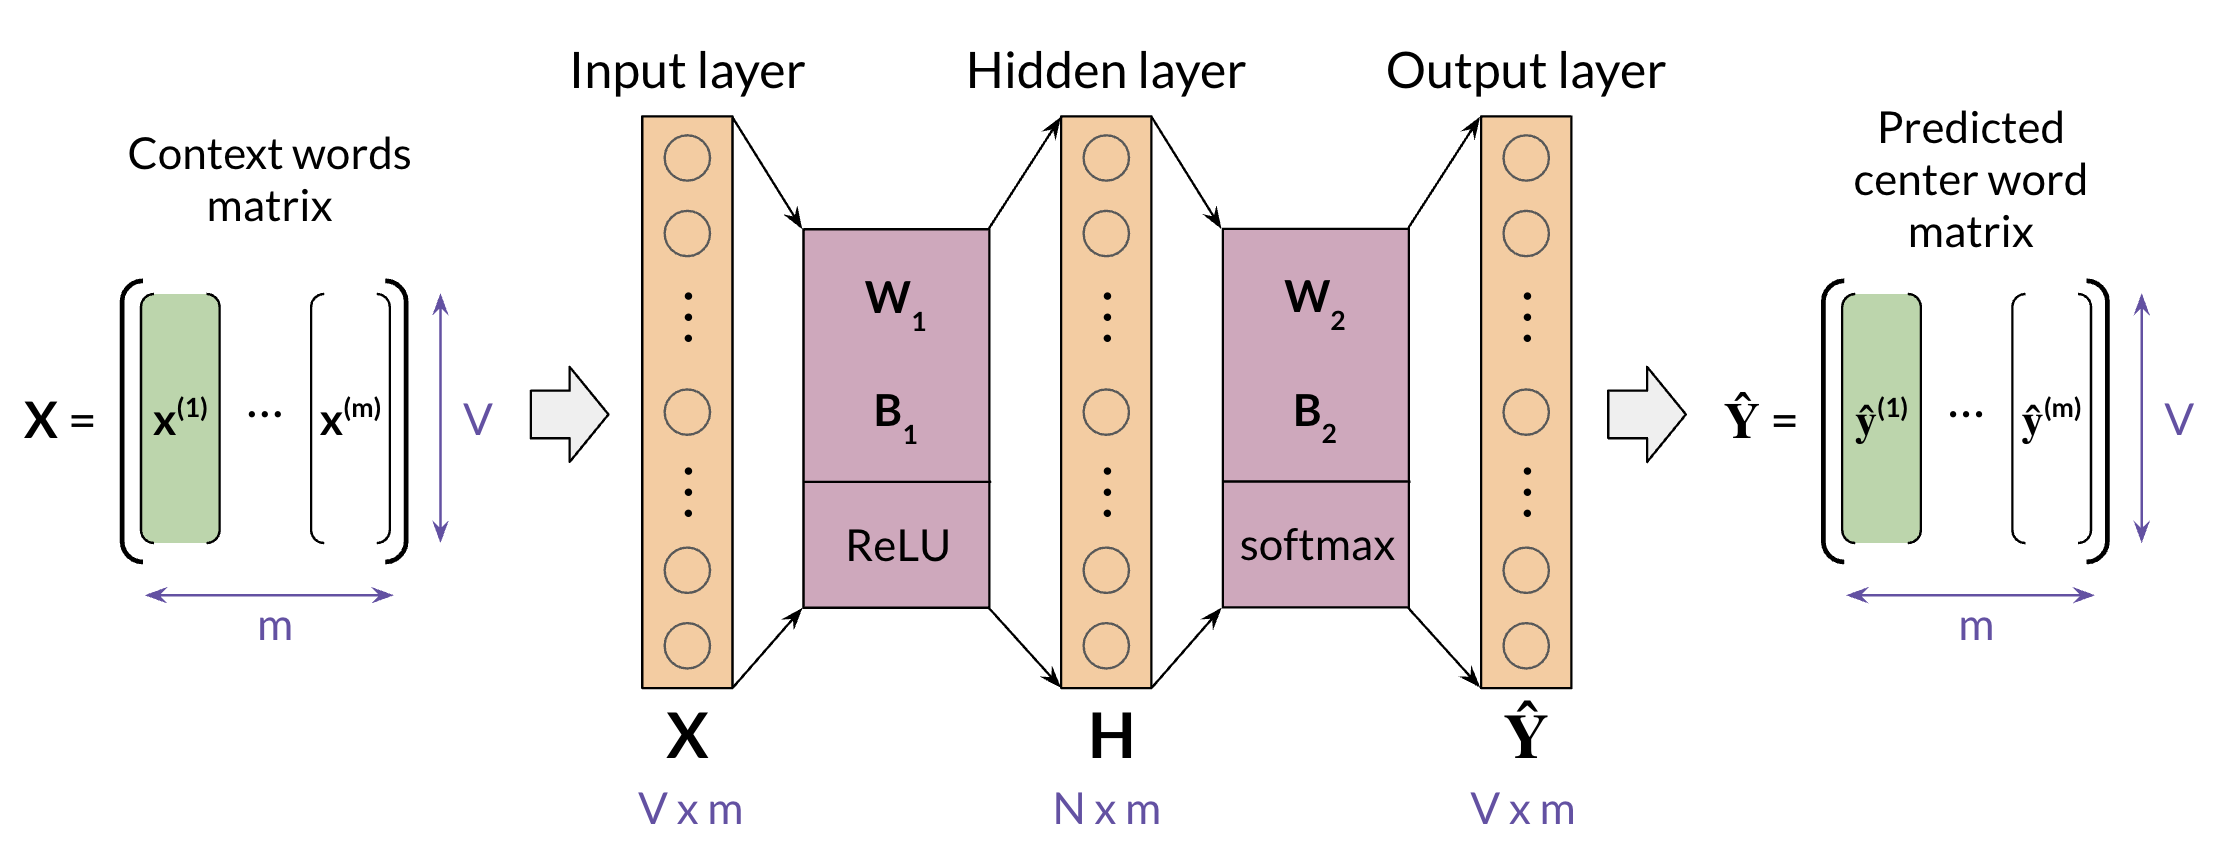

Observe that $x$ is now a matrix with VxM, we stack the column vectors horizontaly.

* The broadcasting procedure is done automatically by numpy

The main functions that we use to capture non-linearity corresponds to ReLU and Sigmoid. In the case of ReLU, this function is define as:
$$\text{ReLU} = \max{(0, x)} $$
Meaning that negative features are not propagated to upper layers.

* The main function for predicting classes corresponds to Softmax function. This function maps our vector into a probability distribution, as it is defined as:
$$\text{softmax} = \frac{e^{x_{j}}}{\sum_{i} e^{x_{i}} } $$
Observe that the exponential function is used to get a positive number.

In [ ]:
# Define a corpus
corpus = 'Who ❤️ "word embeddings" in 2020? I do!!!'

In [ ]:
# Useful functions:

# Get 'word2Ind' and 'Ind2word' dictionaries for the tokenized corpus
word2Ind, Ind2word = get_dict(words)